East-West Airlines is trying to learn more about its customers.  Key issues are their
flying patterns, earning and use of frequent flyer rewards, and use of the airline credit
card.  The task is to identify customer segments via clustering.The file EastWestAirlines.xls contains information on 4000 passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar charactersitics for the purpose of targeting different segments for different types of mileage offers.


Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.


#Steps 

Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset


Implementing Clustering Algorithms:
•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.


Cluster Analysis and Interpretation:
•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.


Visualization:
Visualize the clustering results using scatter plots or other suitable visualization techniques.
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.


Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data display customization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [4]:
# Importing dataset
data1 = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [5]:
# Column rename.
data1.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

#Set ID as Index Column
data1.set_index('ID',inplace=True)
data1

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
1     28143    0           1          1          1          174           
2     19244    0           1          1          1          215           
3     41354    0           1          1          1          4123          
4     14776    0           1          1          1          500           
5     97752    0           4          1          1          43300         
...     ...   ..          ..         ..         ..          ...           
4017  18476    0           1          1          1          8525          
4018  64385    0           1          1          1          981           
4019  73597    0           3          1          1          25447         
4020  54899    0           1          1          1          500           
4021  3016     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
1     1            0                  0                7000                
2     2            0                  0                6968                
3     4            0                  0                7034                
4     1            0                  0                6952                
5     26           2077               4                6935                
...  ..           ..                 ..                 ...                
4017  4            200                1                1403                
4018  5            0                  0                1395                
4019  8            0                  0                1402                
4020  1            500                1                1401                
4021  0            0                  0                1398                

      Award  
ID           
1     0      
2     0      
3     0      
4     0      
5     1      
...  ..      
4017  1      
4018  1      
4019  1      
4020  0      
4021  0      

[3999 rows x 11 columns]

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

Note: 1 = under 5,000 2 = 5,000 - 10,000 3 = 10,001 - 25,000 4 = 25,001 - 50,000 5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [6]:
data1.describe()


Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03  3999.000000   3999.000000  3999.000000  3999.000000   
mean   7.360133e+04  144.114529    2.059515     1.014504     1.012253      
std    1.007757e+05  773.663804    1.376919     0.147650     0.195241      
min    0.000000e+00  0.000000      1.000000     1.000000     1.000000      
25%    1.852750e+04  0.000000      1.000000     1.000000     1.000000      
50%    4.309700e+04  0.000000      1.000000     1.000000     1.000000      
75%    9.240400e+04  0.000000      3.000000     1.000000     1.000000      
max    1.704838e+06  11148.000000  5.000000     3.000000     5.000000      

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count  3999.000000    3999.00000   3999.000000        3999.000000       
mean   17144.846212   11.60190     460.055764         1.373593          
std    24150.967826   9.60381      1400.209171        3.793172          
min    0.000000       0.00000      0.000000           0.000000          
25%    1250.000000    3.00000      0.000000           0.000000          
50%    7171.000000    12.00000     0.000000           0.000000          
75%    23800.500000   17.00000     311.000000         1.000000          
max    263685.000000  86.00000     30817.000000       53.000000         

       Days_since_enroll        Award  
count  3999.00000         3999.000000  
mean   4118.55939         0.370343     
std    2065.13454         0.482957     
min    2.00000            0.000000     
25%    2330.00000         0.000000     
50%    4096.00000         0.000000     
75%    5790.50000         1.000000     
max    8296.00000         1.000000

In [7]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [8]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take

print('unique_cc1',data1.cc1_miles.unique())
print('unique_cc2',data1.cc2_miles.unique())
print('unique_cc3',data1.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [9]:
# As a part of the Data cleansing we check the data for any missing/ na values
# null count for columns

null_count_col = data1.isnull().sum().value_counts(ascending=False)

# null percentage for columns

null_percent_col = (data1.isnull().sum() * 100 / len(data1)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    11
dtype: int64 

Null Percentage for Columns:

 0.0    11
dtype: int64


In [10]:
# null count for rows

null_count_row = data1.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for rows

null_percent_row = (data1.isnull().sum(axis=1) * 100 / len(data1)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    3999
dtype: int64 

Null Percentage for Rows:

 0.0    3999
dtype: int64


In [11]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
data1.duplicated().sum()

1

In [12]:
data1[data1.duplicated()]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
3899  1000     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
3899  0            0                  0                1597                

      Award  
ID           
3899  0

In [13]:
data=data1.drop_duplicates()

In [15]:
data.duplicated().sum()

0

In [16]:
data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                      
1   28143    0           1          1          1          174           
2   19244    0           1          1          1          215           
3   41354    0           1          1          1          4123          
4   14776    0           1          1          1          500           
5   97752    0           4          1          1          43300         

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  
ID                                                                             
1   1            0                  0                7000               0      
2   2            0                  0                6968               0      
3   4            0                  0                7034               0      
4   1            0                  0                6952               0      
5   26           2077               4                6935               1

There are no missing / Null and Duplicated values either in columns or rows, so we can move on to the next step, which is Exploratory Data Analysis.

In [22]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [23]:
#Lets analyze the features by creating histograms to understand the distribution


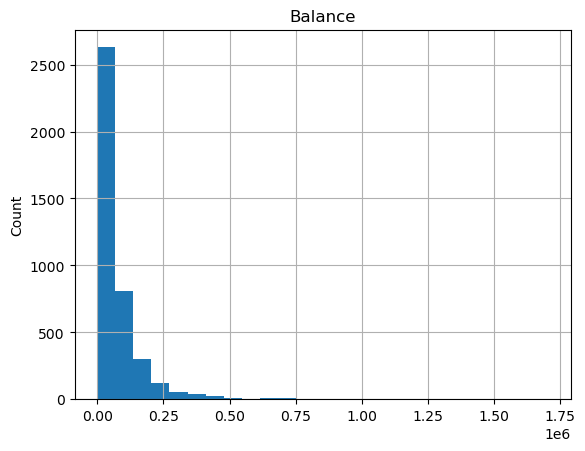

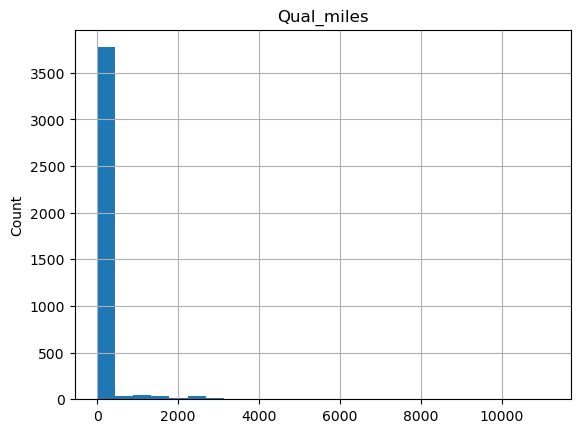

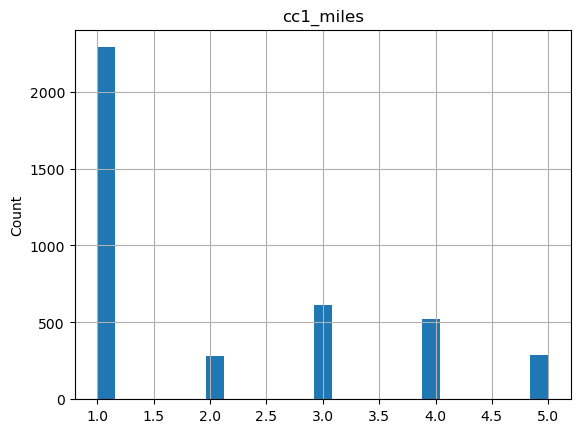

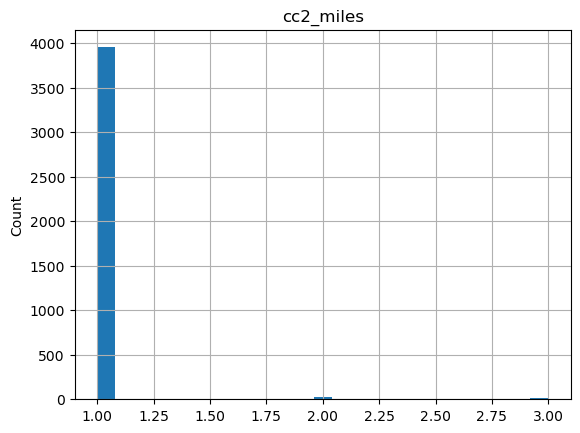

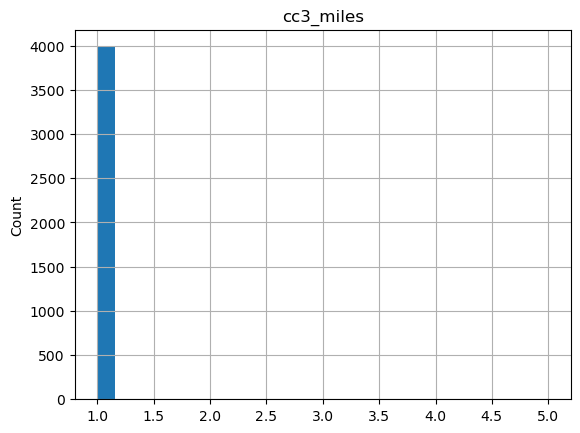

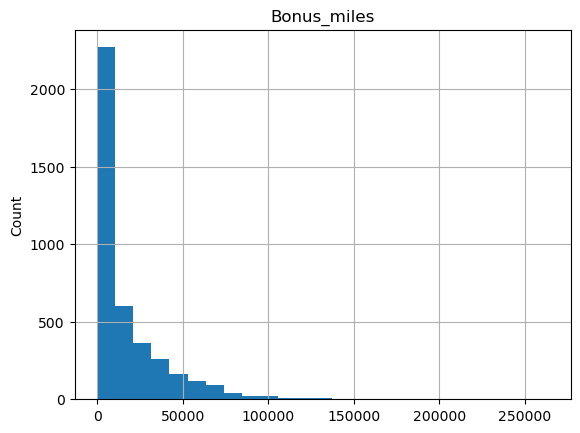

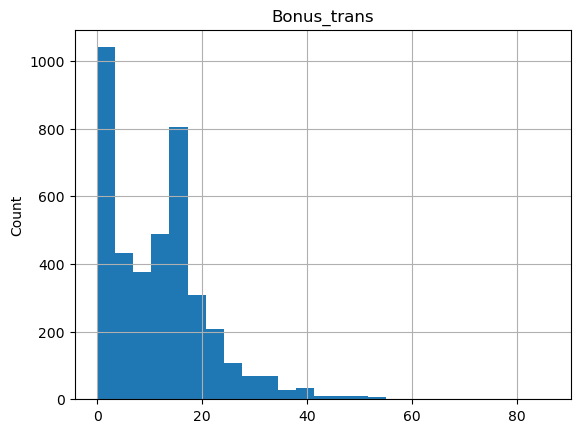

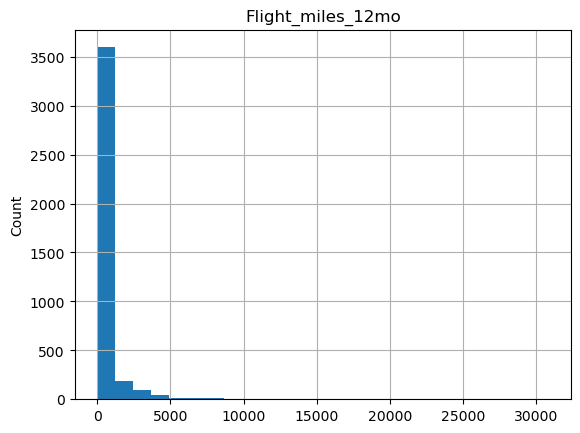

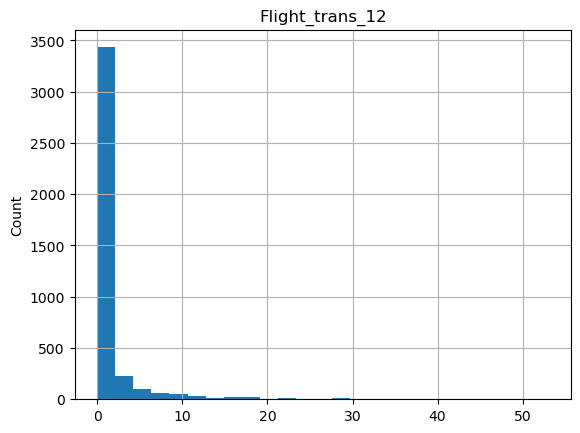

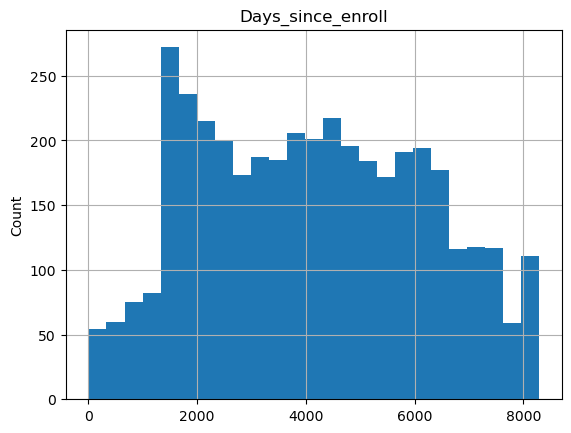

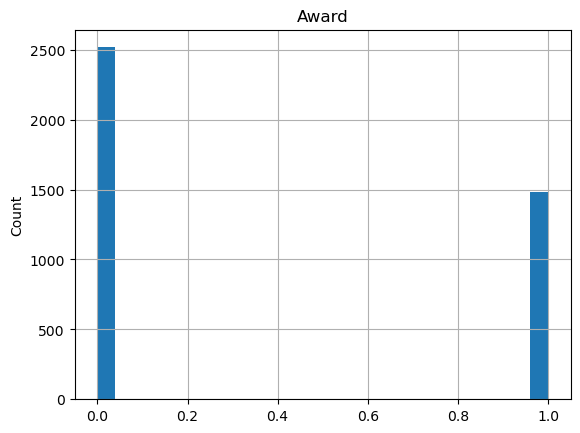

In [24]:
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Balance


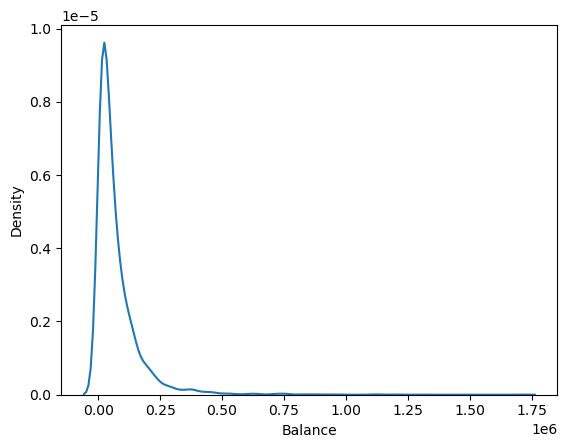

Qual_miles


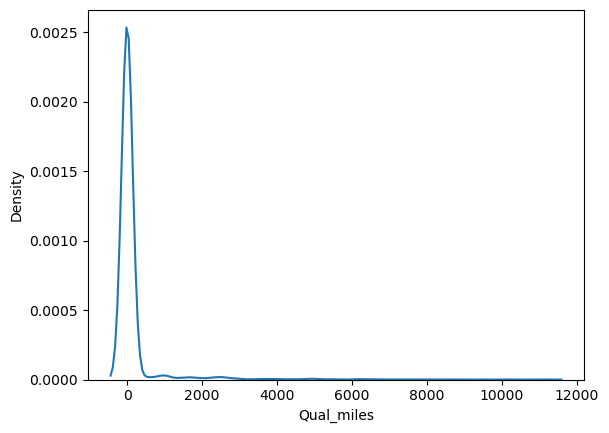

cc1_miles


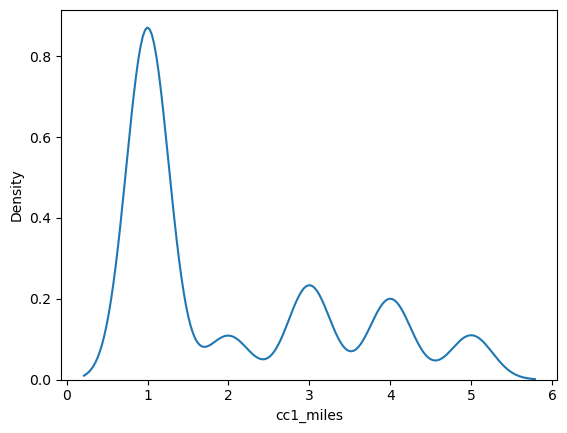

cc2_miles


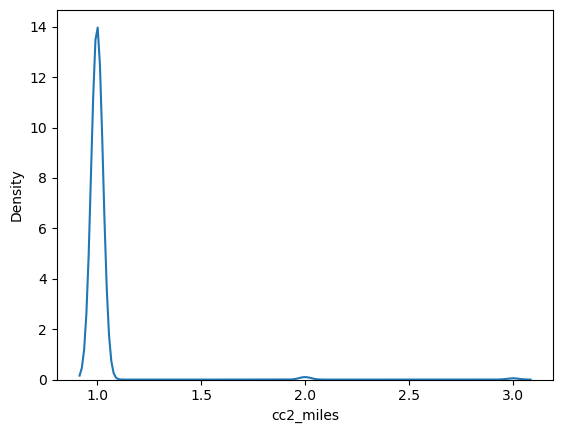

cc3_miles


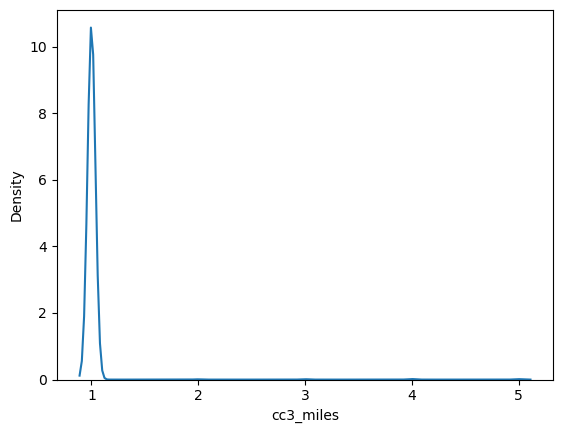

Bonus_miles


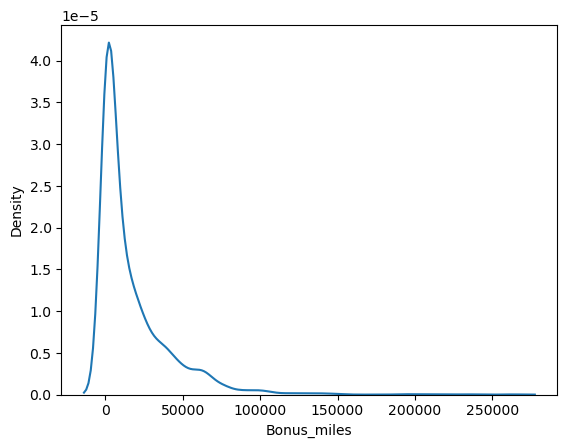

Bonus_trans


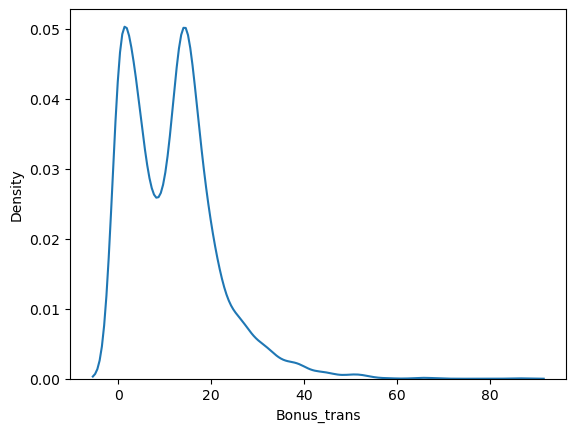

Flight_miles_12mo


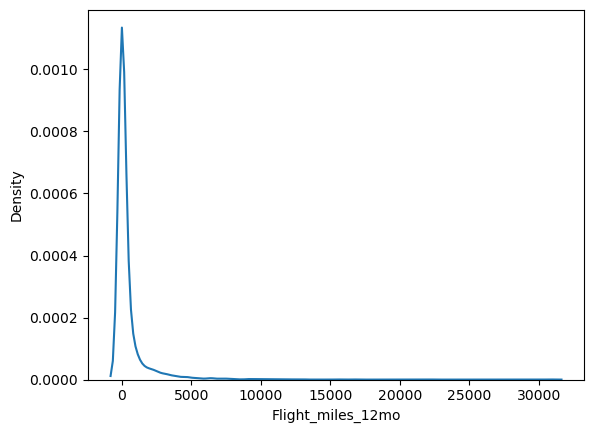

Flight_trans_12


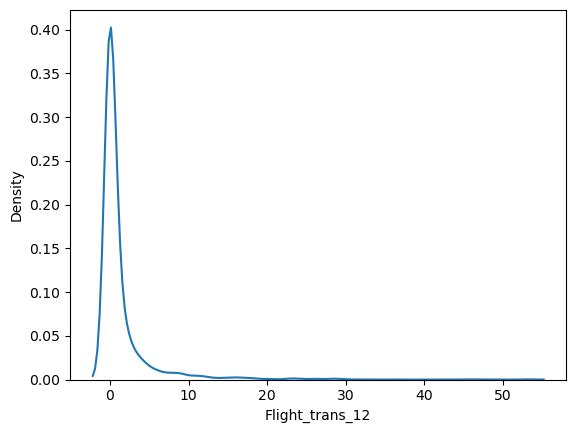

Days_since_enroll


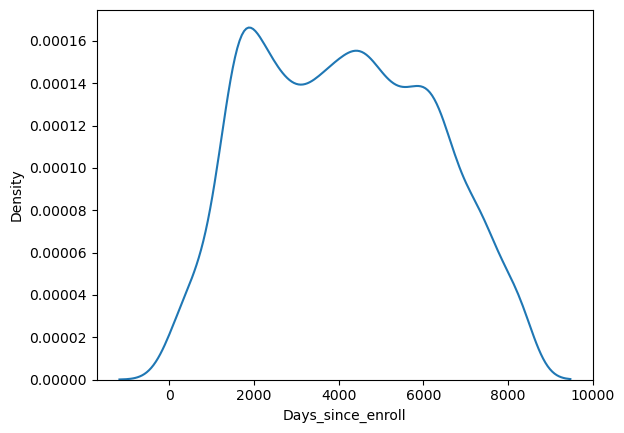

Award


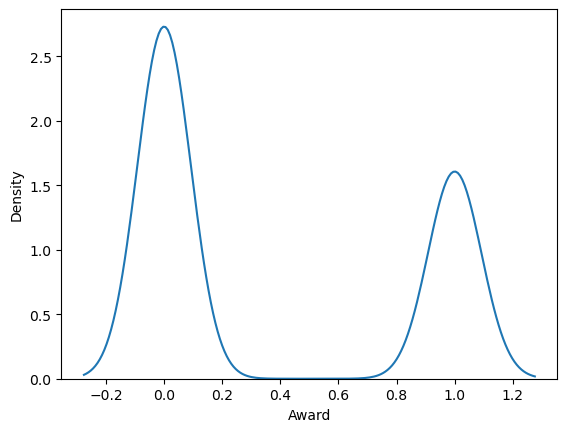

In [25]:
  # Kernel Density for every feature, singled out

for n in data.columns:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

Outliers Detection

In [26]:
data.columns


Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

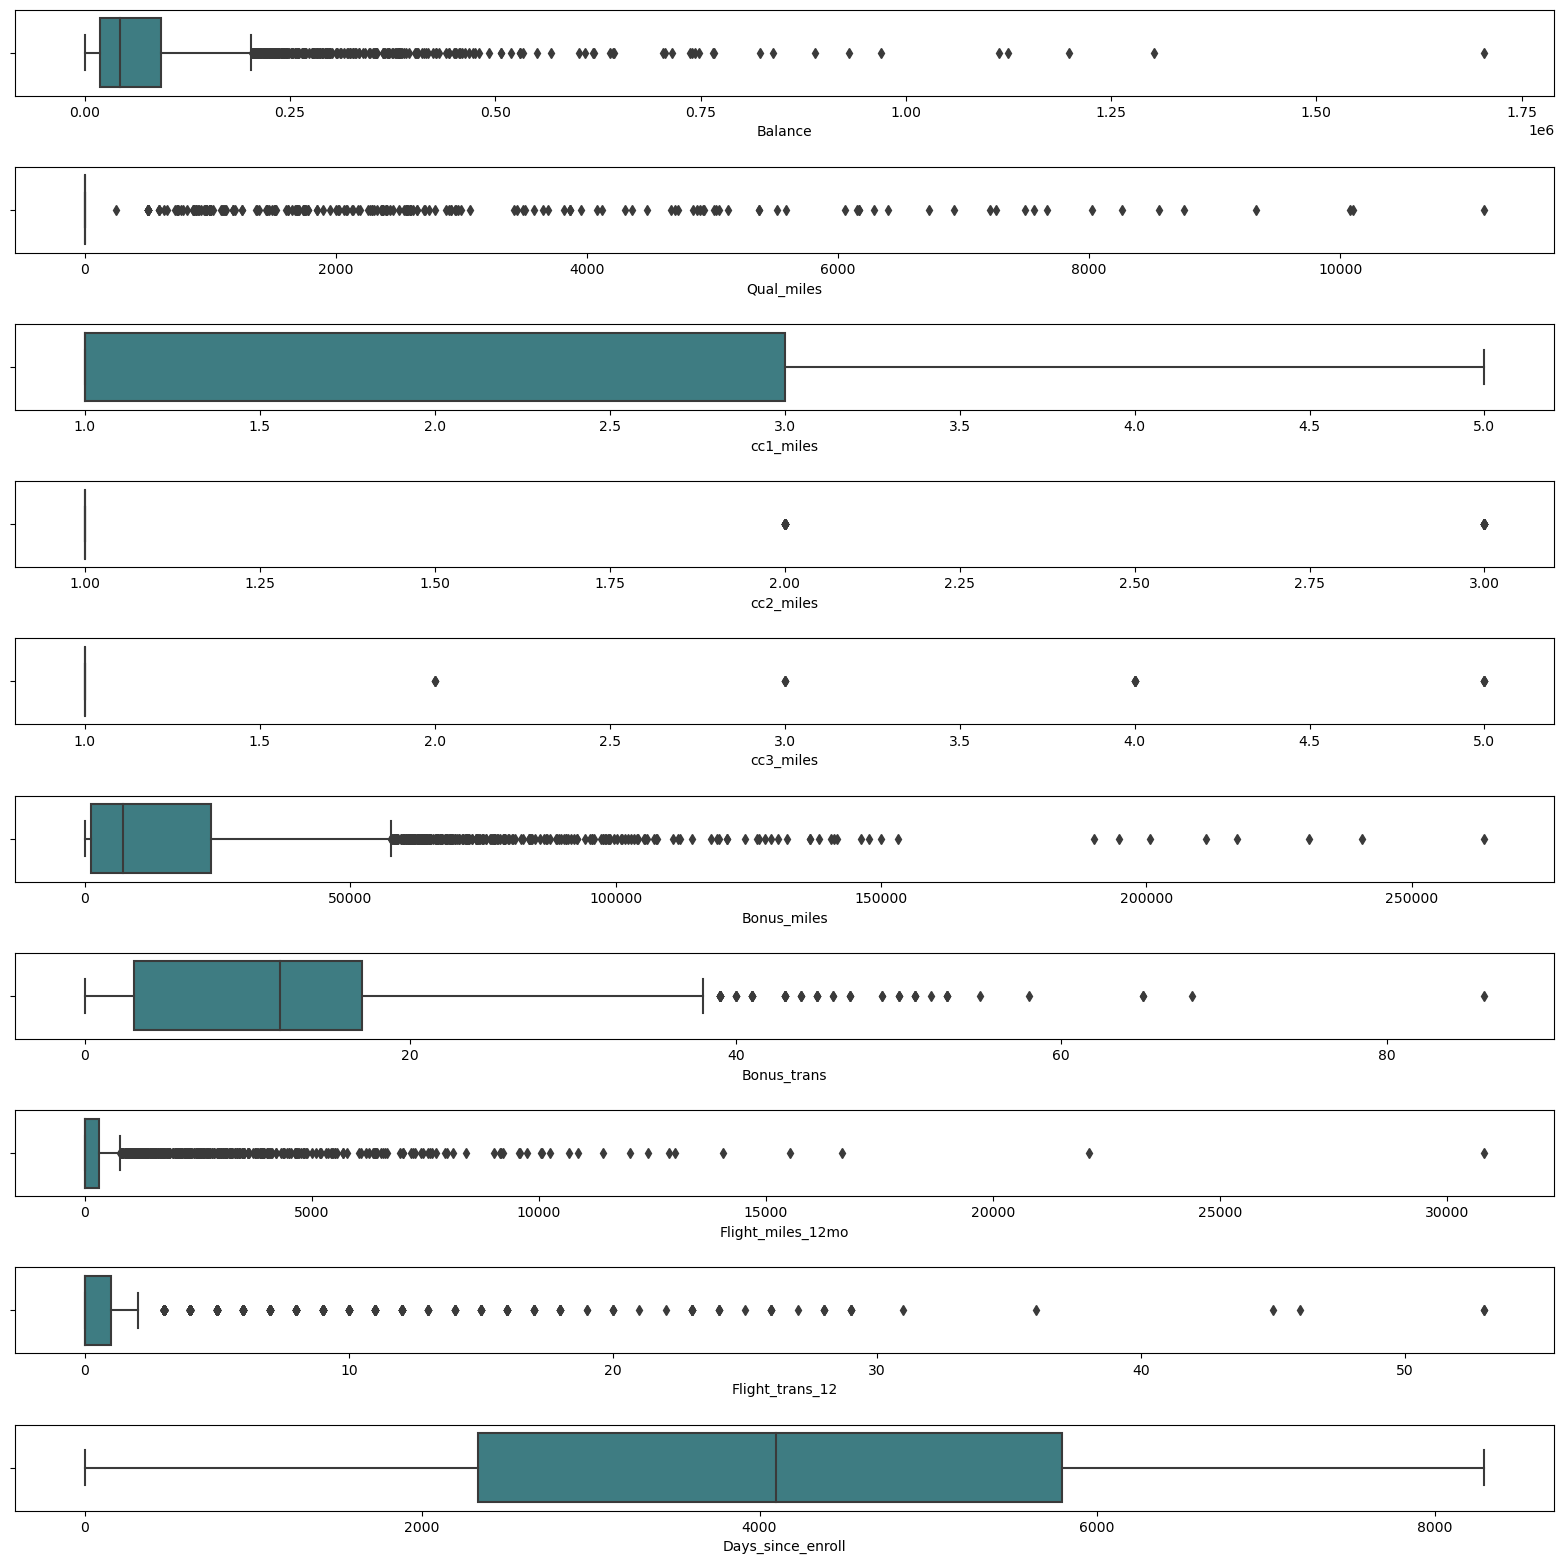

In [27]:
ot=data.copy() 
fig, axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=ot,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

<AxesSubplot:>

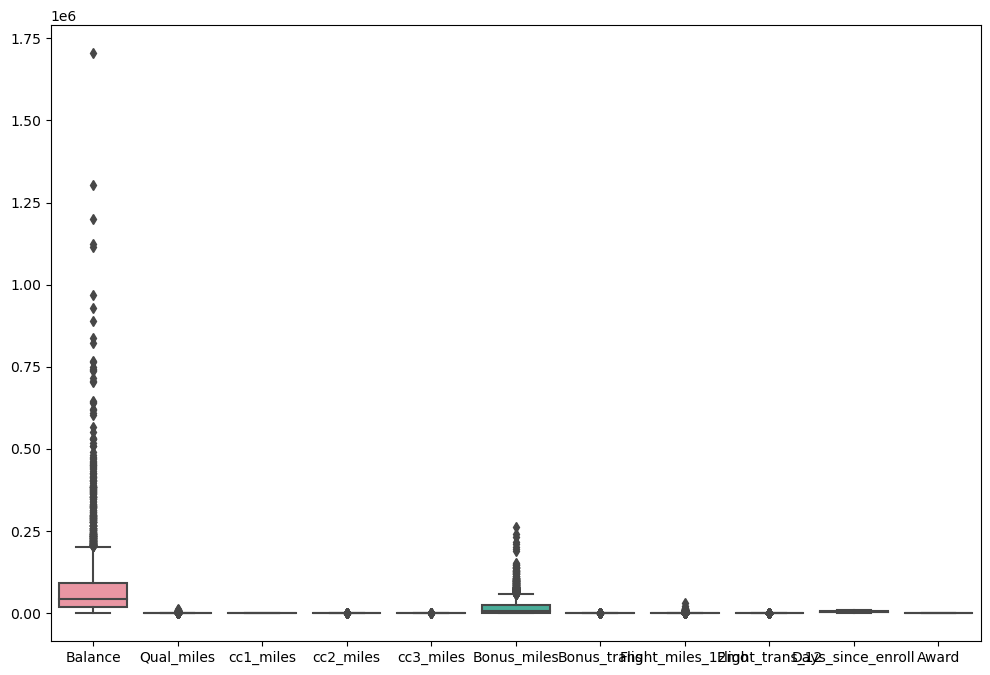

In [28]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=data)

<AxesSubplot:>

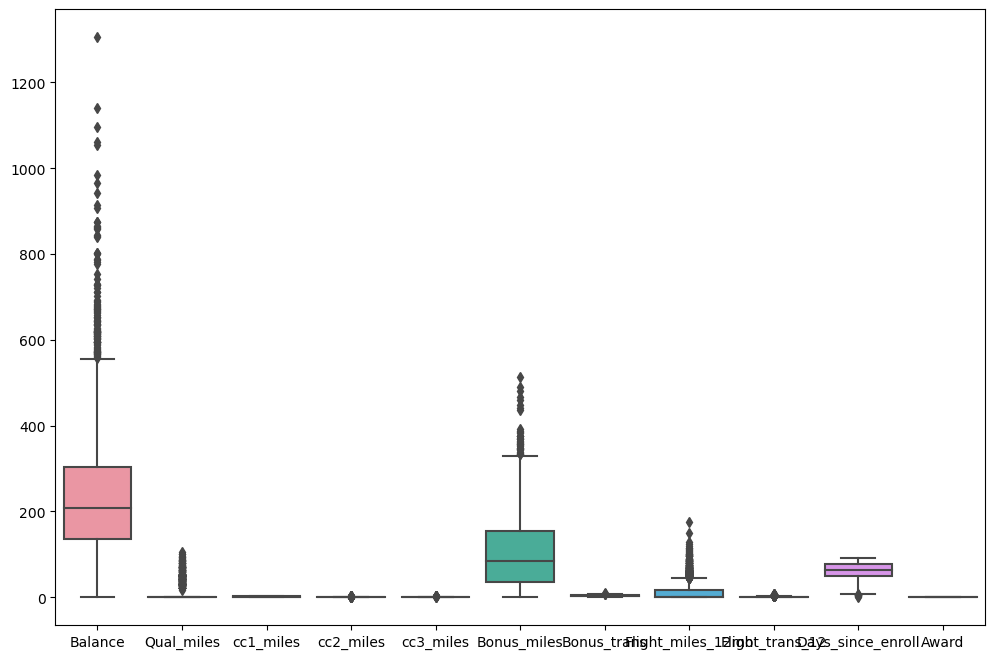

In [29]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(data))

# Data Visualization

In [30]:
countNotermdeposit = len(data[data.Award == 0])
counthavetermdeposit = len(data[data.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(data.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((counthavetermdeposit / (len(data.Award))*100)))

Percentage of Customer doesn't have a Award: 62.96%
Percentage of Customer does have a Award: 37.04%


Text(0.5, 1.0, 'Whether the client has a Award or not ')

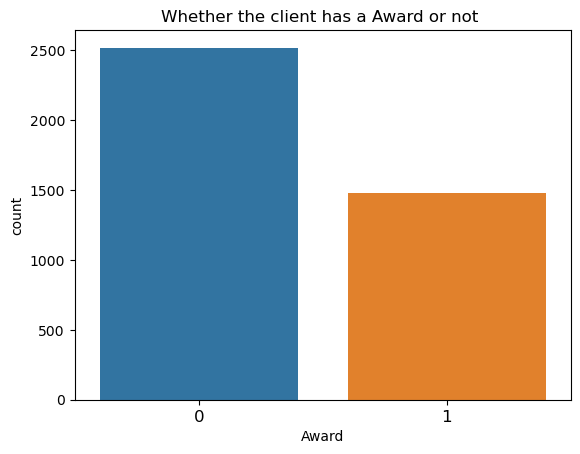

In [31]:
sns.countplot(x='Award', data=data, 
              order=data['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')

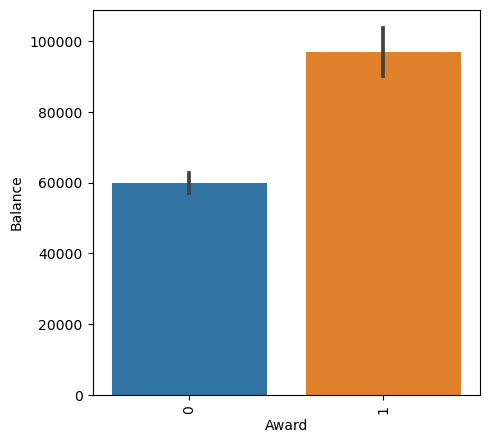

In [32]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = data[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [33]:
# what is correlated with Balance?

corr_matrix = data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403410
cc1_miles            0.338252
Bonus_trans          0.324797
Days_since_enroll    0.262975
Flight_trans_12      0.255656
Flight_miles_12mo    0.217509
Award                0.178380
Qual_miles           0.108696
cc3_miles            0.035234
cc2_miles           -0.008822
Name: Balance, dtype: float64

dataset = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
sns.pairplot(dataset)

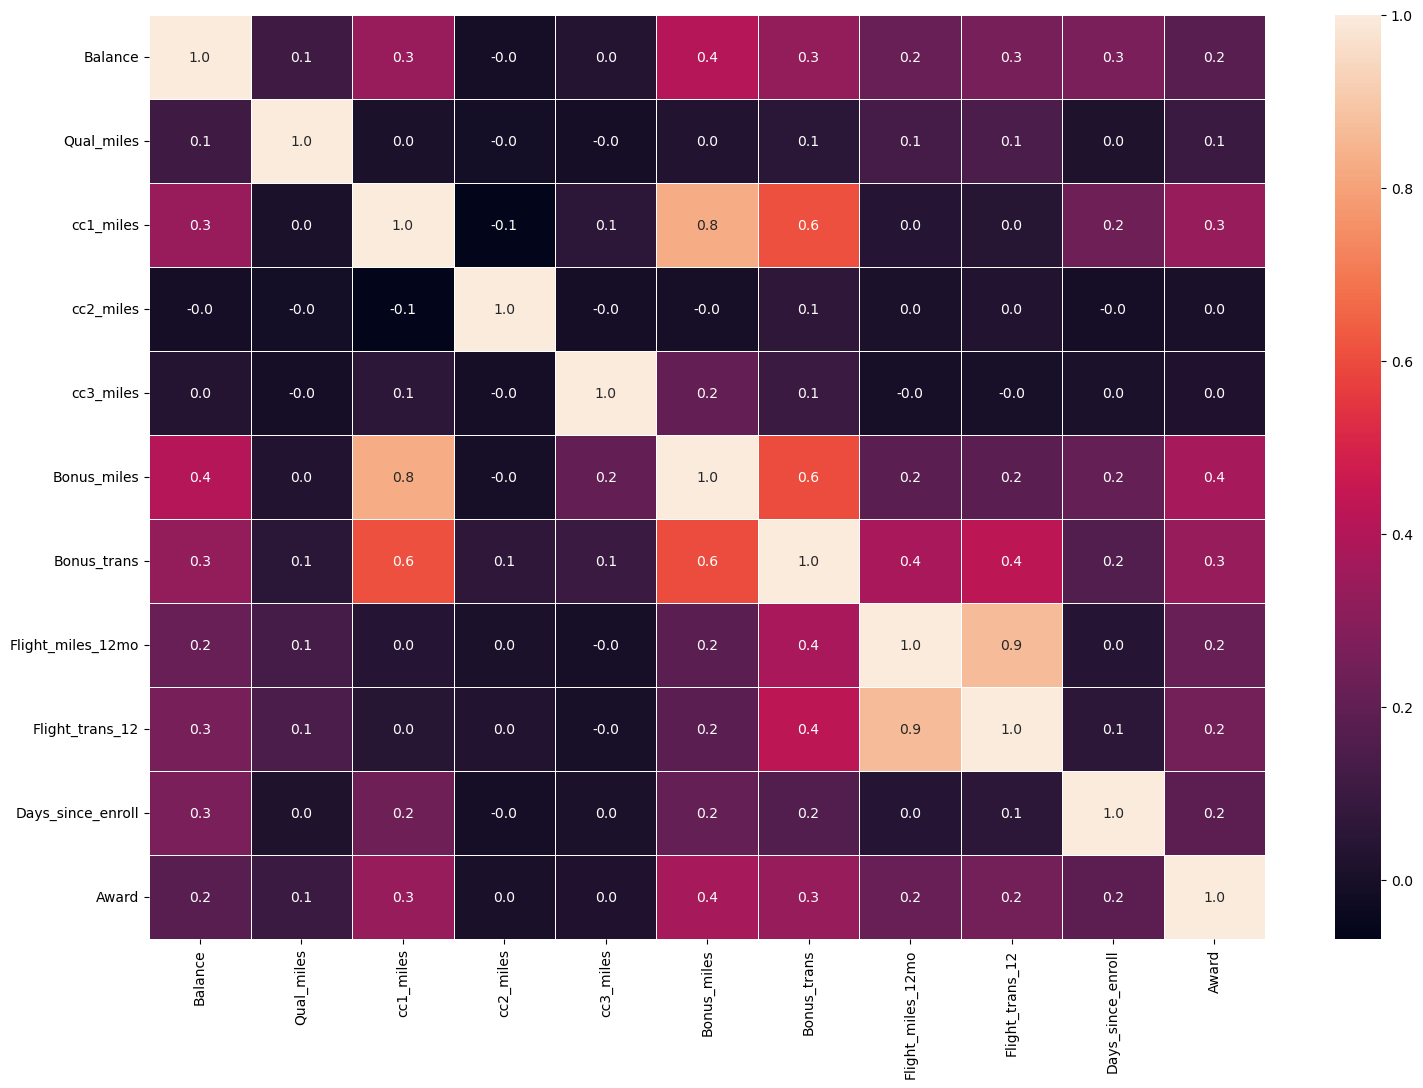

In [34]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

Unique points in this correlation matrix:

flight_trans_12 is positively correlated with flight_miles_12mo
bonus_trans is positively correlated with cc1_miles
bonus_trans is positively correlated with bonus_miles
bonus_miles is positively correlated with cc1_miles
In other words, the following are positively correlated

Number of flight transactions in the past 12 months <-> Number of flight miles in the past 12 months
Miles passengers earn with the freq. flyer credit card <-> Amount of non-flight transactions
Number of non-flight bonus transactions <-> Miles passengers earn from non-flight bonus transactions
Miles passengers earn from non-flight bonus transactions <-> Miles passengers earn with the freq. flyer credit card

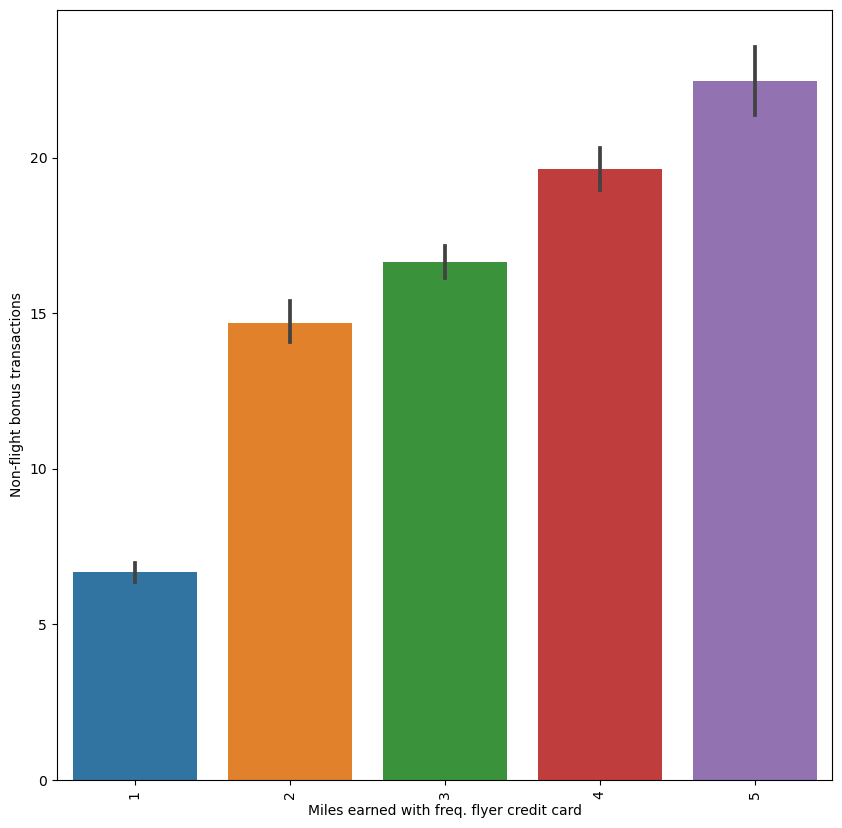

In [35]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

In [36]:
#People who fly more frequently use bonus transactions more

# Data Preprocessing

In [37]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data)
std_df.shape

(3998, 11)

In [38]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(data)
minmax_df.shape

(3998, 11)

# KMeans Clustering

#After all the analyses we now start with the K-Means Clustering procedure

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid. The first step in k-means is to pick the number of clusters, k. Then keep the iterations running until one of the below satisifes:

Centroids of newly formed clusters do not change
Points remain in the same cluster
Maximum number of iterations are reached
In K Means clustering we need to first assign the K number of clusters which can be taken up using the thumb rule of "Sqrt(n)/2" or plotting the Elbow curve, aka Scree plot.

Elbow Method for Determining Cluster Amount

In [39]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0   1             43978.000000  
1   2             35402.348376  
2   3             30893.146022  
3   4             27157.030546  
4   5             23704.596951  
5   6             21467.062672  
6   7             18888.828047  
7   8             17314.499688  
8   9             16044.866436  
9   10            14725.185611  
10  11            13705.367325  
11  12            12945.411946  
12  13            12425.845439  
13  14            11975.568212

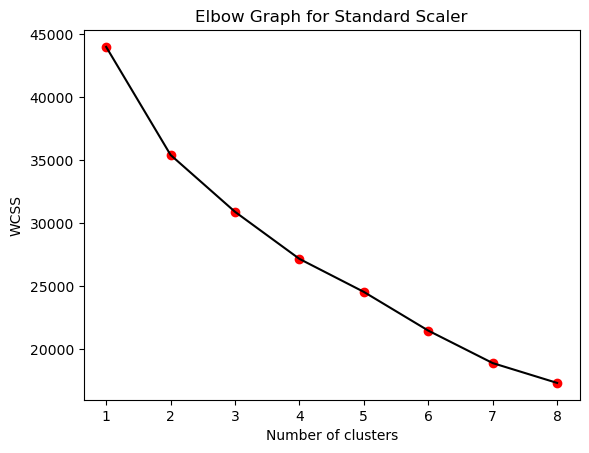

In [40]:
# within-cluster sum-of-squares criterion 
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

There is no clear "elbow" visible. A choice of 3 or 4 clusters seems to be fair. Let's see the silhouette score
Internal measures for cluster validation

The goal of partitioning clustering algorithms is to split the data set into clusters of objects, such that:
the objects in the same cluster are similar as much as possible, and the objects in different clusters are highly distinct That is, we want the average distance within cluster to be as small as possible; and the average distance between clusters to be as large as possible.

Internal validation measures reflect often the compactness, the connectedness and the separation of the cluster partitions.

Compactness or cluster cohesion: Measures how close are the objects within the same cluster. A lower within-cluster variation is an indicator of a good compactness (i.e., a good clustering). The different indices for evaluating the compactness of clusters are base on distance measures such as the cluster-wise within average/median distances between observations.
Separation: Measures how well-separated a cluster is from other clusters. The indices used as separation measures include: distances between cluster centers the pairwise minimum distances between objects in different clusters
Connectivity: corresponds to what extent items are placed in the same cluster as their nearest neighbors in the data space. The connectivity has a value between 0 and infinity and should be minimized. Generally most of the indices used for internal clustering validation combine compactness and separation measures as follow:
Index=(α×Separation)(β×Compactness)

Where α and β are weights.

In this section, we’ll describe the two commonly used indices for assessing the goodness of clustering: the silhouette width and the Dunn index. These internal measure can be used also to determine the optimal number of clusters in the data.


# Silhouette Score
Silhouette coefficient

The silhouette analysis measures how well an observation is clustered and it estimates the average distance between clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters.
For each observation i, the silhouette width si is calculated as follows:

For each observation i, calculate the average dissimilarity ai between i and all other points of the cluster to which i belongs.
For all other clusters C, to which i does not belong, calculate the average dissimilarity d(i,C) of i to all observations of C. The smallest of these d(i,C) is defined as bi=minCd(i,C). The value of bi can be seen as the dissimilarity between i and its “neighbor” cluster, i.e., the nearest one to which it does not belong.

Finally the silhouette width of the observation i is defined by the formula: Si=(bi−ai)/max(ai,bi).
Silhouette width can be interpreted as follow:
Observations with a large Si (almost 1) are very well clustered.
A small Si (around 0) means that the observation lies between two clusters.
Observations with a negative Si are probably placed in the wrong cluster.

In [41]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

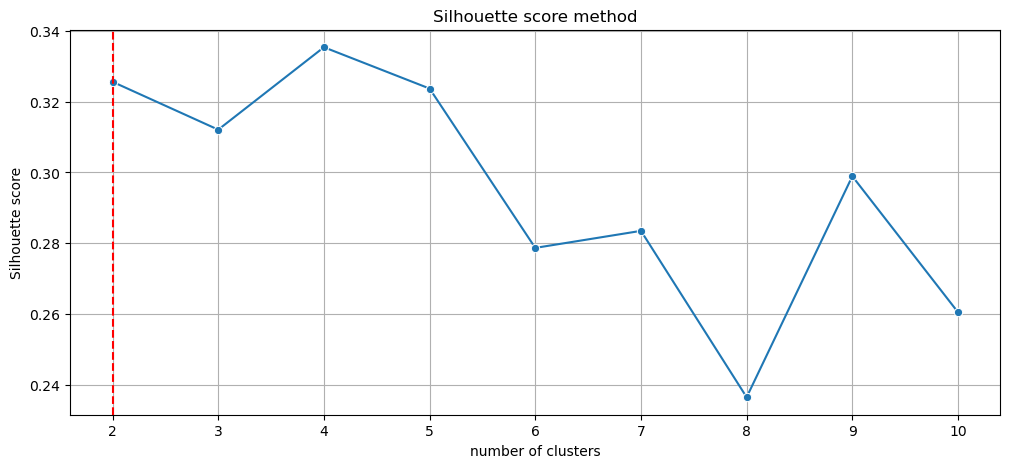

In [42]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

In [43]:
#Silhouette score method indicates the best options would be respectively 2 clusters.


In [44]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

Elbow Plot for Standard Scaler data


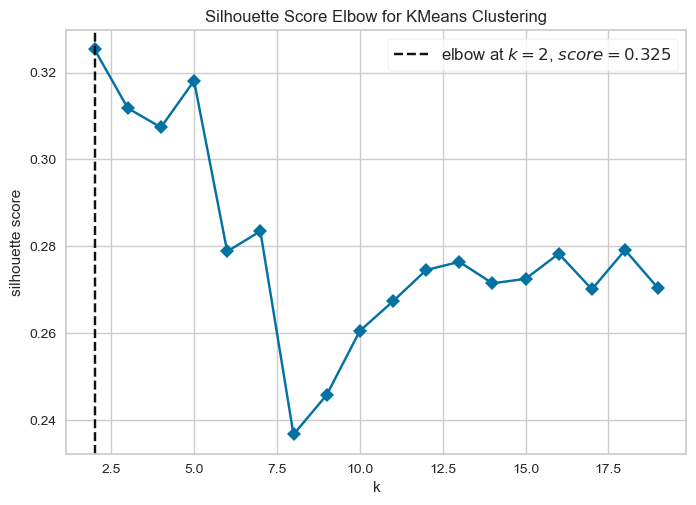

In [45]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will use Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_df)    
visualizer.poof()
plt.show()

In [46]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.32531882107641713
For n_clusters = 3 The average silhouette_score is : 0.3120743629337082
For n_clusters = 4 The average silhouette_score is : 0.31003837126661404
For n_clusters = 5 The average silhouette_score is : 0.32371282485521125
For n_clusters = 6 The average silhouette_score is : 0.33378006995858245
For n_clusters = 7 The average silhouette_score is : 0.22365222966492318
For n_clusters = 8 The average silhouette_score is : 0.237314726017899
For n_clusters = 9 The average silhouette_score is : 0.24489425763143474


For n_clusters = 2 The average silhouette_score is : 0.32531882107641713
For n_clusters = 3 The average silhouette_score is : 0.3120743629337082
For n_clusters = 4 The average silhouette_score is : 0.31003837126661404
For n_clusters = 5 The average silhouette_score is : 0.32371282485521125
For n_clusters = 6 The average silhouette_score is : 0.33378006995858245
For n_clusters = 7 The average silhouette_score is : 0.22365222966492318
For n_clusters = 8 The average silhouette_score is : 0.237314726017899
For n_clusters = 9 The average silhouette_score is : 0.24489425763143474


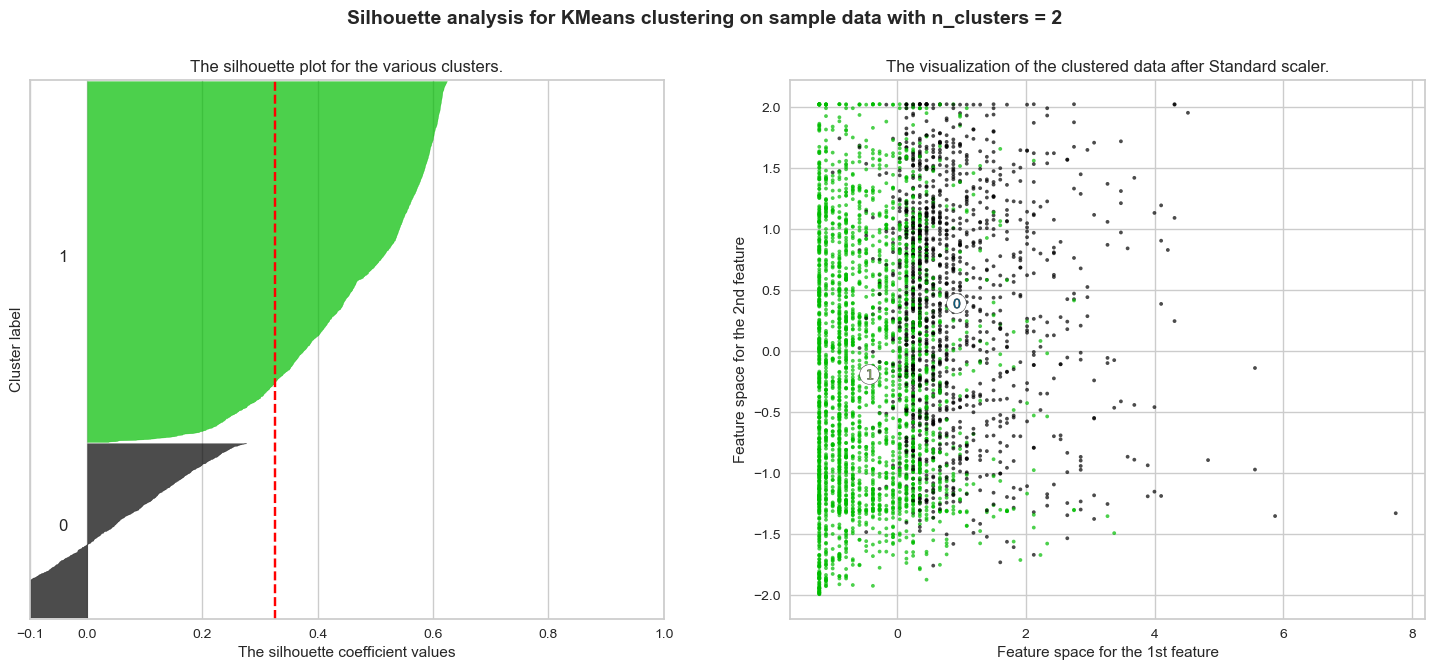

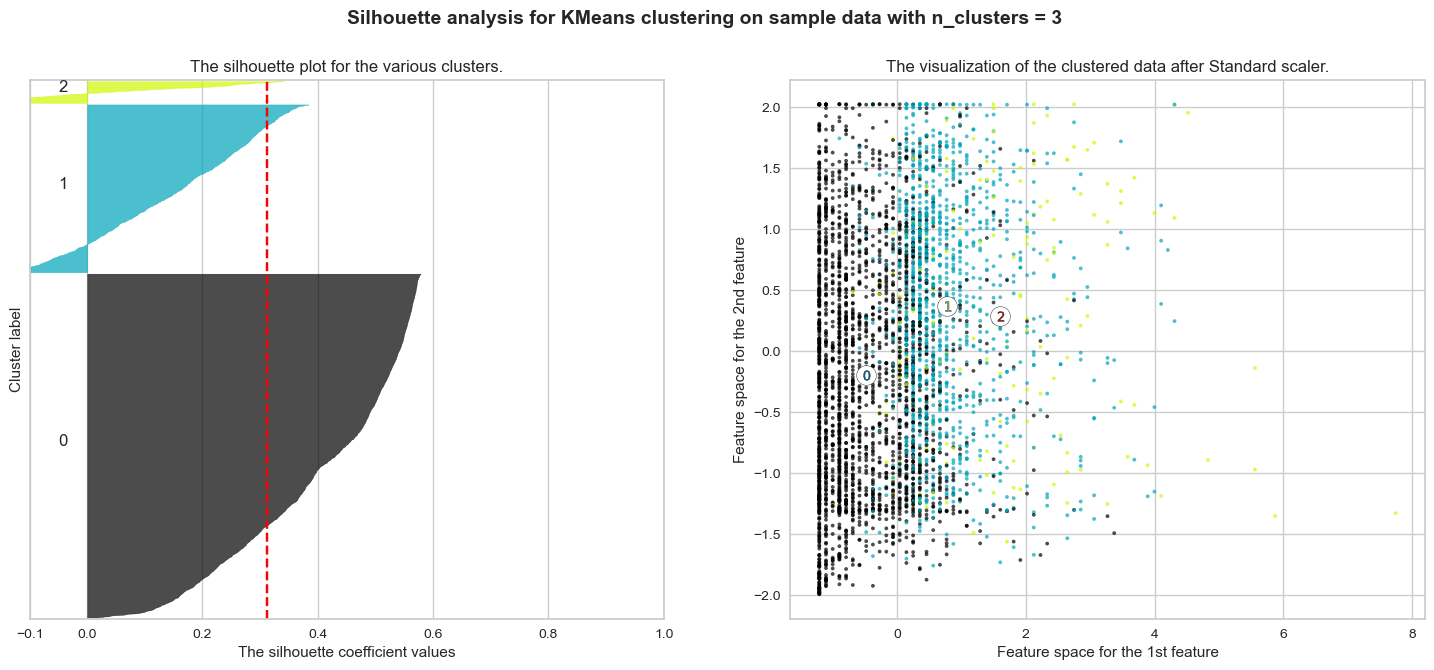

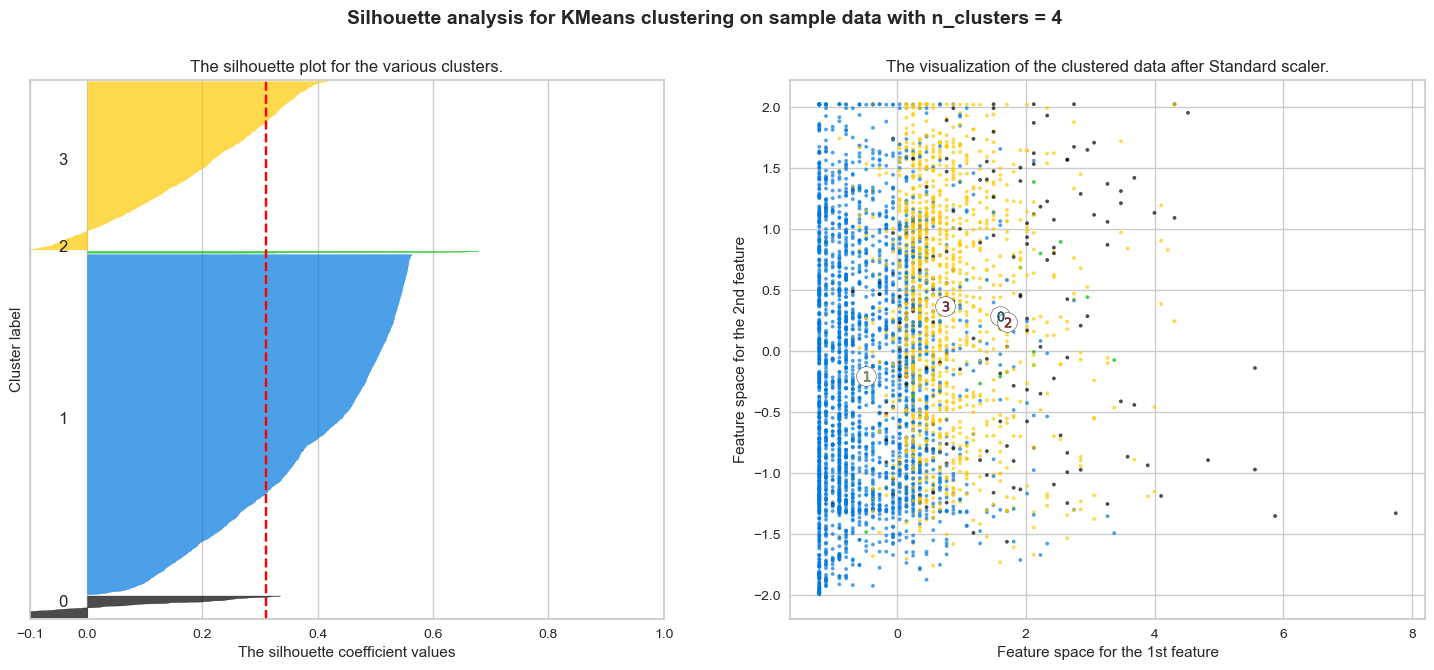

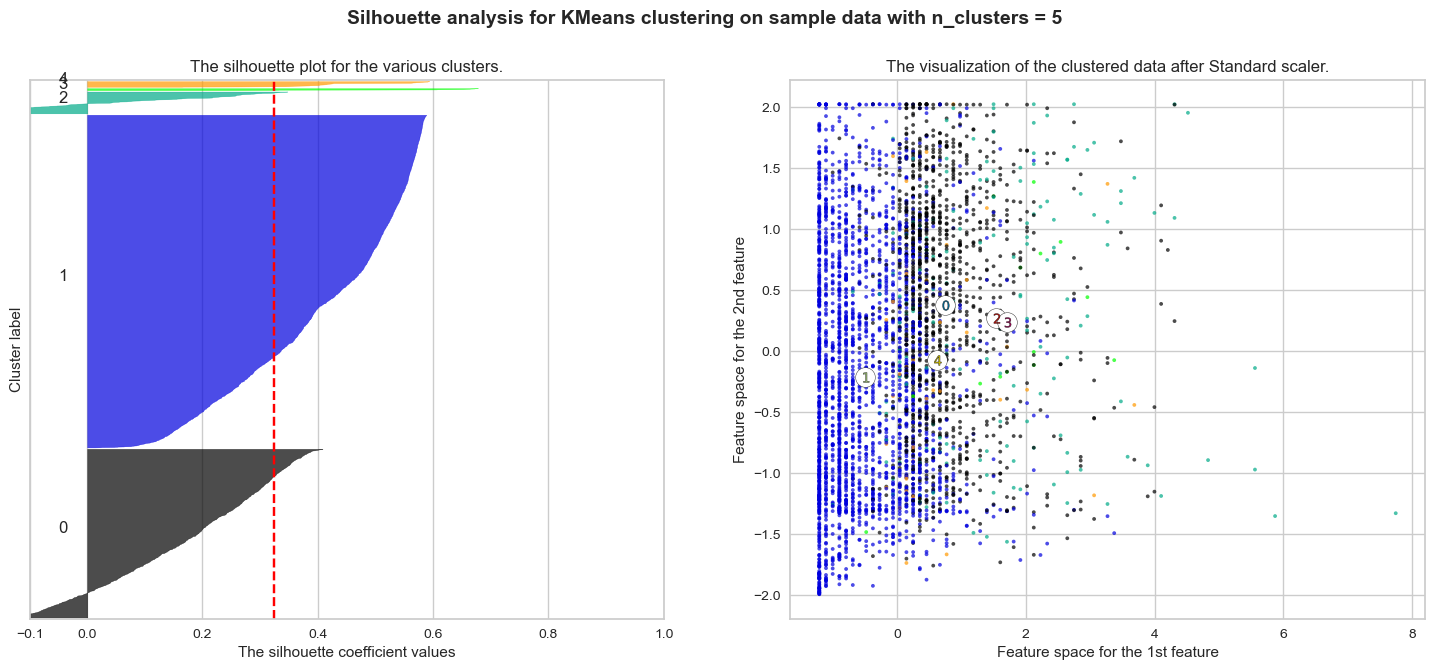

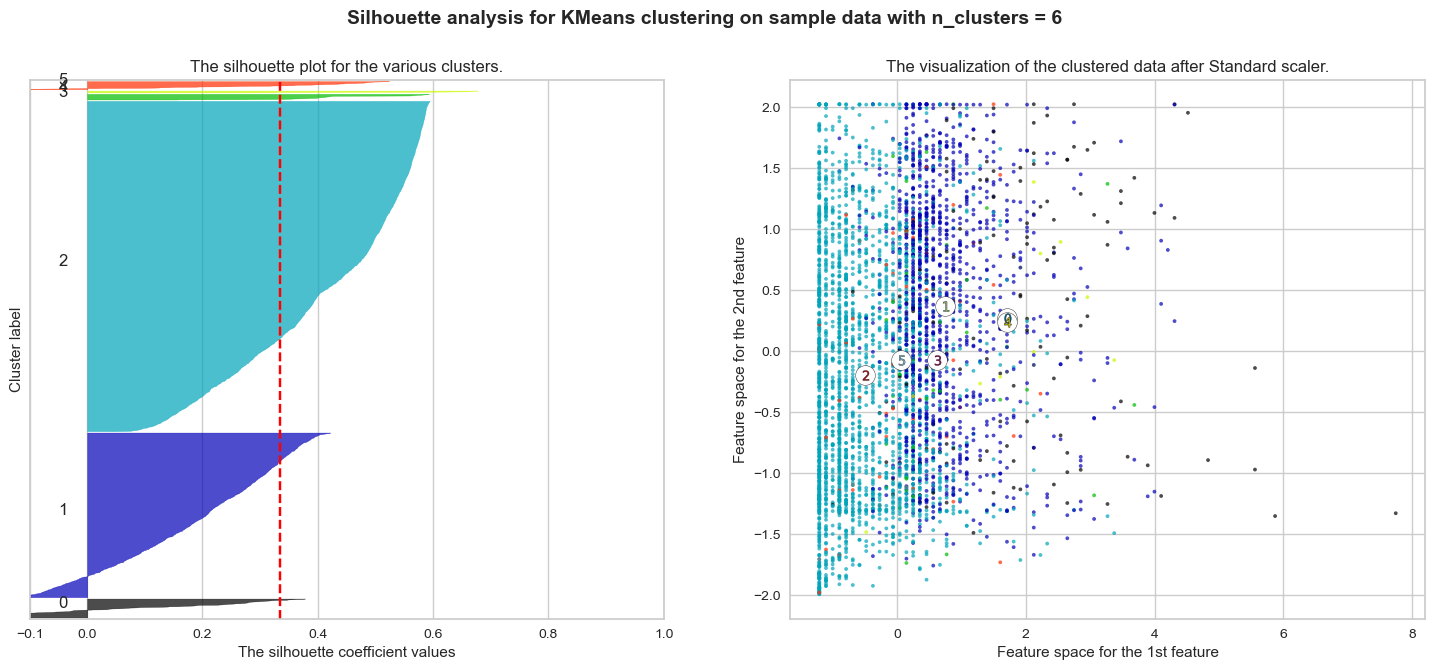

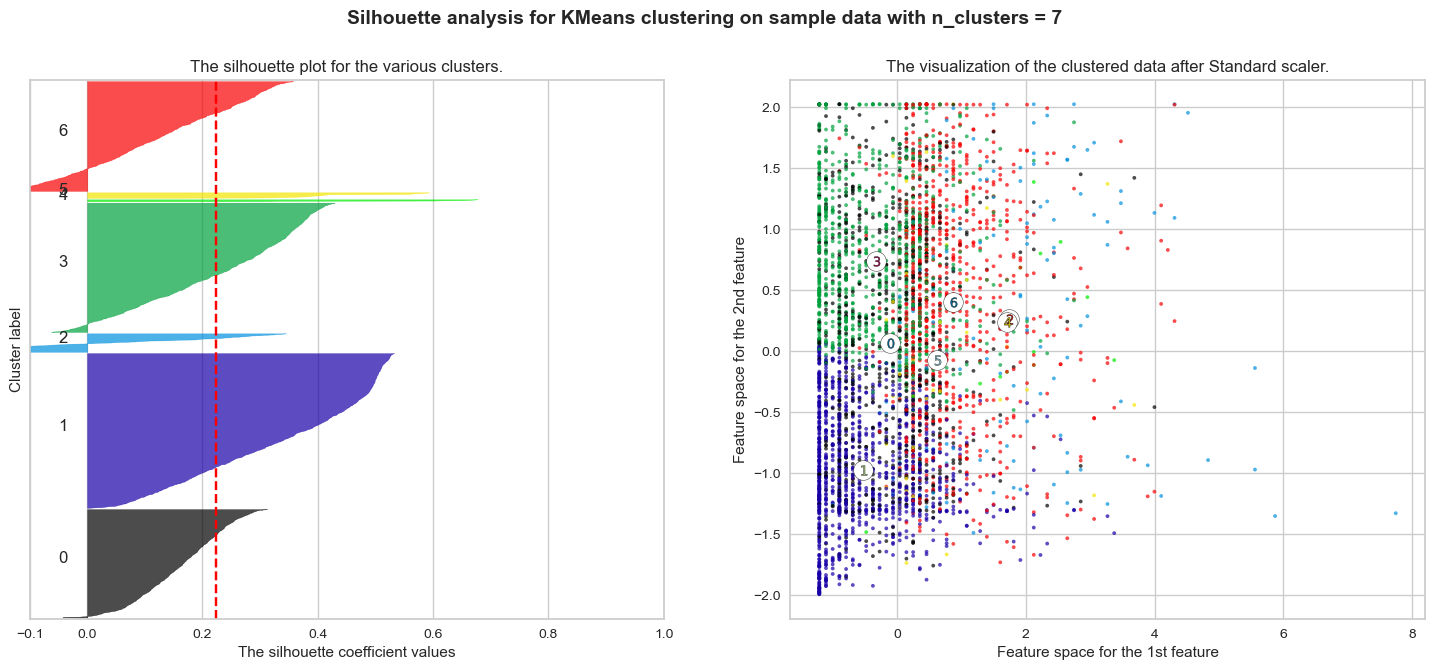

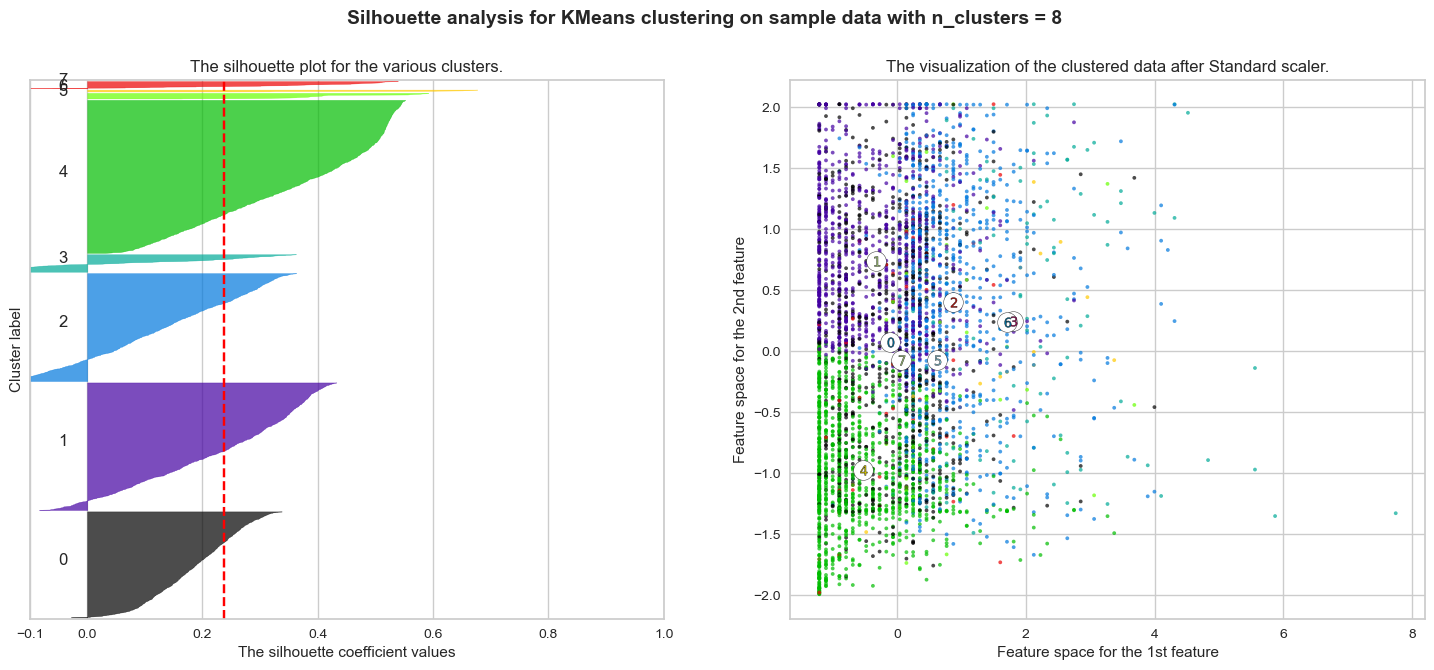

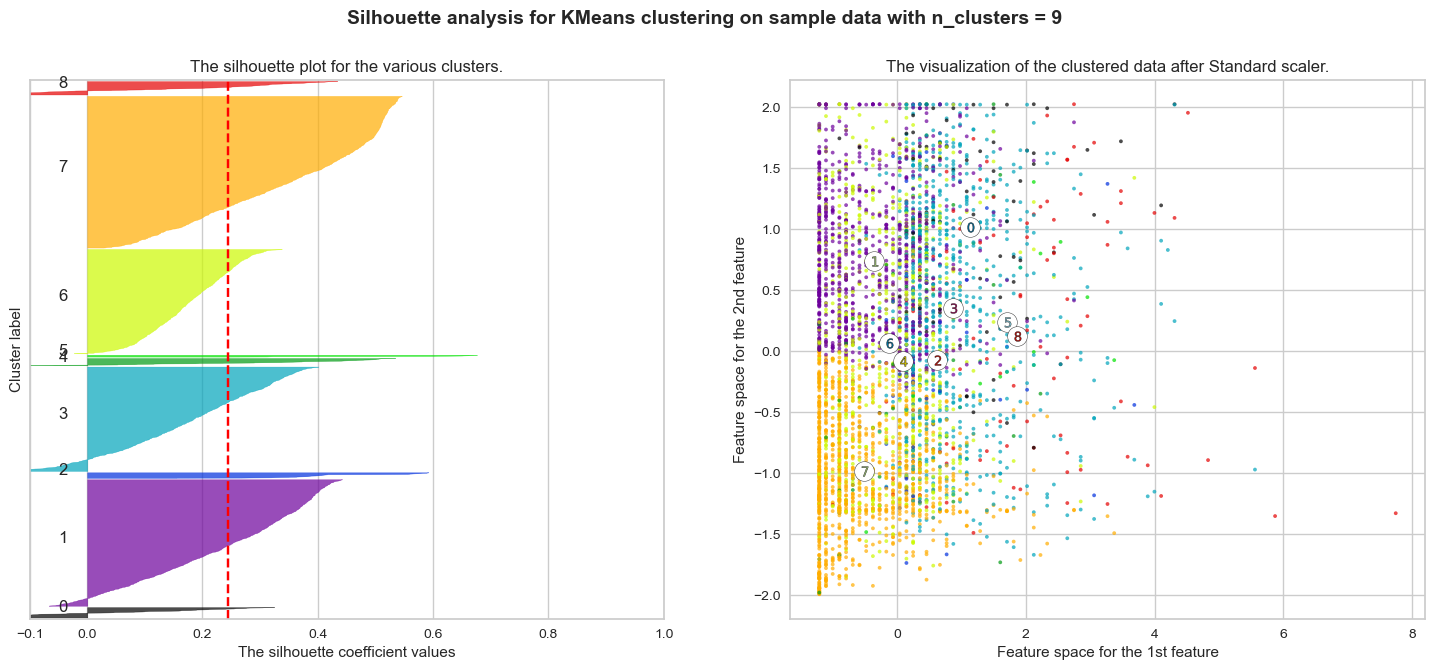

In [47]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(std_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(std_df[:,6], std_df[:, 9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,6], centers[:,9], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Conclusion:
According the the silhouette score of:

The standardized data, the ideal number of clusters is 6, with a score higher than other options, of 0.33

Build KMeans Cluster algorithm using K=6 and Standard Scaler Applied Dataset

In [48]:
# we have found good number of cluster = 6
# model building using cluster numbers = 6

model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(3998,)

In [49]:
# these are nothing but cluster labels...

y_predict_kmeans

array([2, 2, 2, ..., 1, 2, 2])

In [50]:
model_kmeans.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [51]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[ 1.13661978,  0.41416471,  0.13434996, -0.09825429, -0.06277446,
         0.6561826 ,  1.70528239,  3.77057434,  4.00160023,  0.27124922,
         0.88372079],
       [ 0.43360655, -0.11304557,  1.20989562, -0.09825429, -0.05450669,
         0.92790005,  0.75243243, -0.08073137, -0.0896464 ,  0.37051107,
         0.57831847],
       [-0.2944391 , -0.12884258, -0.6016064 , -0.09825429, -0.06072325,
        -0.51689575, -0.49353627, -0.18636708, -0.19846289, -0.19781849,
        -0.34994003],
       [-0.04706705, -0.15626333, -0.66838569,  9.03710982, -0.06277446,
        -0.1018366 ,  0.61758448,  0.08745745,  0.22023229, -0.0727739 ,
         0.0515894 ],
       [ 0.63950059, -0.08446932,  1.02183982, -0.09825429, 15.64433492,
         3.1793166 ,  1.7144102 ,  0.0332068 ,  0.05959833,  0.2395819 ,
         0.33731815],
       [ 0.45689596,  6.73023291, -0.0434189 , -0.09825429, -0.06277446,
         0.06353524,  0.06505958,  0.3595715 ,  0.39411338, -0.07153328,
         0.387

In [52]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

21086.325857898282

In [53]:
#Assign clusters to the data set
data['Kmeans_label'] = model_kmeans.labels_

In [54]:
# Group data by Clusters (K=6)
data.groupby('Kmeans_label').agg(['mean'])

Balance   Qual_miles cc1_miles cc2_miles cc3_miles  \
                       mean         mean      mean      mean      mean   
Kmeans_label                                                             
0             188155.664336  464.573427   2.244755  1.000000  1.000000   
1             117176.916331  58.446500    3.720837  1.000000  1.001609   
2             43899.574007   43.575612    1.229844  1.000000  1.000401   
3             68876.581395   23.255814    1.139535  2.348837  1.000000   
4             138061.400000  78.800000    3.466667  1.000000  4.066667   
5             119660.491803  5351.065574  2.000000  1.000000  1.000000   

               Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
                      mean        mean              mean            mean   
Kmeans_label                                                               
0             32995.580420  27.979021   5739.692308       16.552448        
1             39485.872084  18.811746   346.617860        1.032180         
2             4646.073004   6.855596    199.240273        0.621340         
3             14689.837209  17.534884   582.627907        2.209302         
4             93927.866667  28.066667   506.666667        1.600000         
5             18683.475410  12.229508   963.639344        2.868852         

             Days_since_enroll     Award  
                          mean      mean  
Kmeans_label                              
0             4679.251748       0.797203  
1             4887.485921       0.649236  
2             3707.224629       0.200963  
3             3968.930233       0.395349  
4             4613.866667       0.533333  
5             3971.491803       0.557377

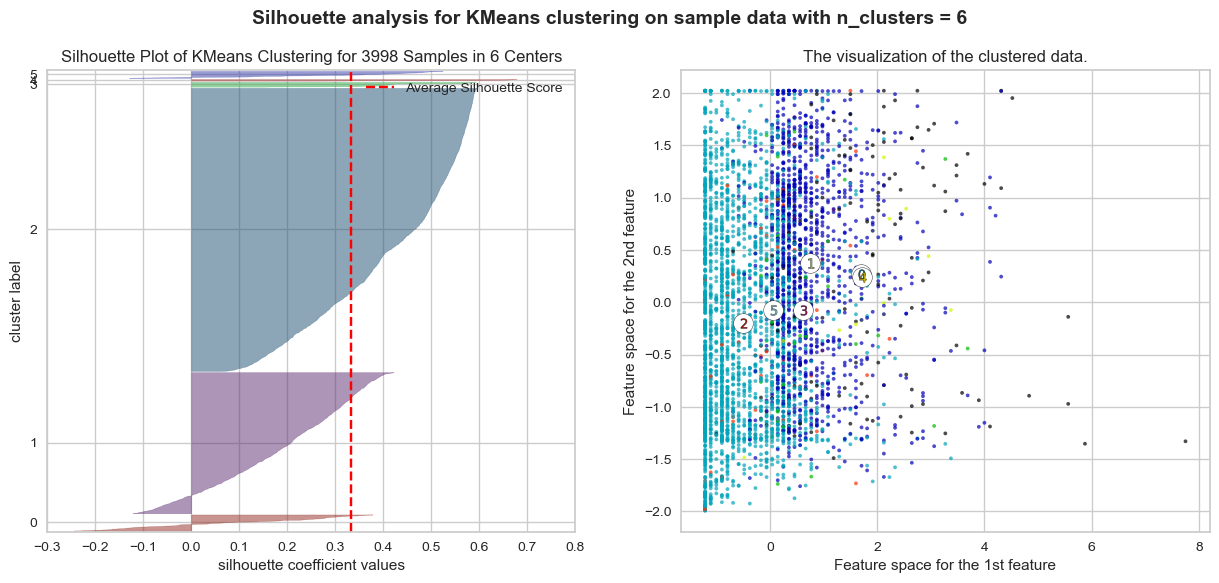

In [55]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(std_df[:, 6], std_df[:, 9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

Elbow Method and Silhouette Score on MinMaxScaler Applied Data

In [56]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0   1             1830.468023   
1   2             823.558363    
2   3             625.101720    
3   4             436.642089    
4   5             348.934750    
5   6             315.290932    
6   7             287.920388    
7   8             263.039829    
8   9             243.921941    
9   10            231.737752    
10  11            214.825704    
11  12            205.881715    
12  13            196.669886    
13  14            186.433159

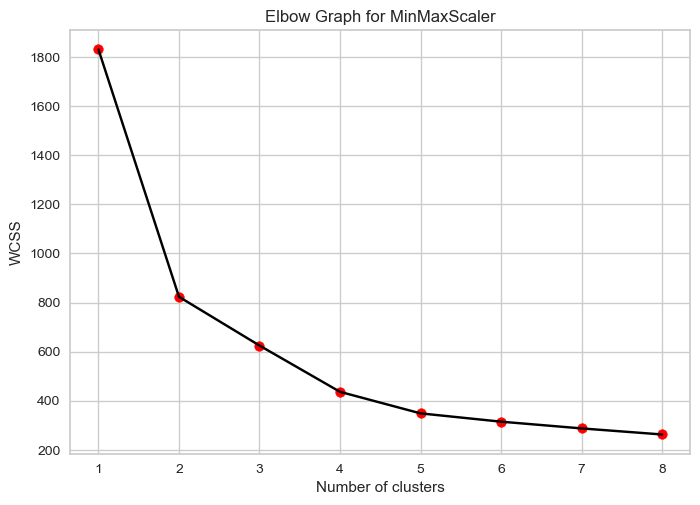

In [57]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

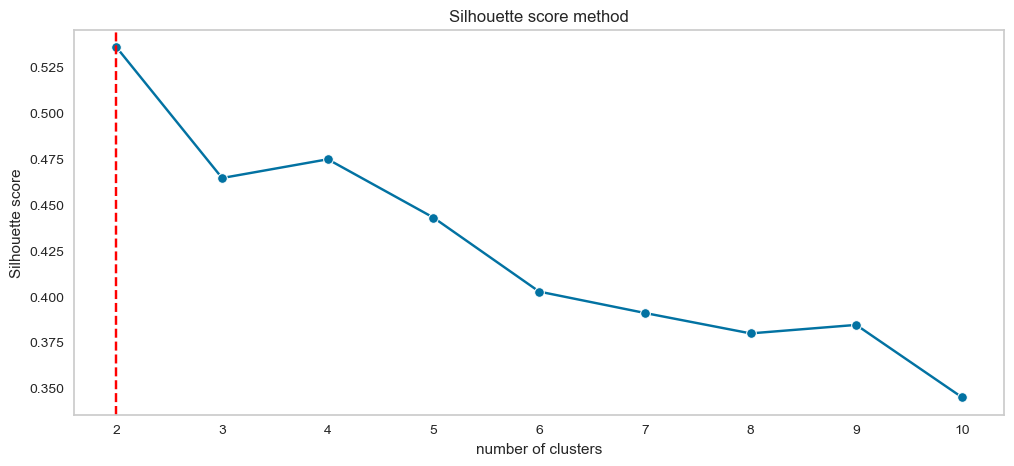

In [58]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(minmax_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(minmax_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for MinMaxScaler data


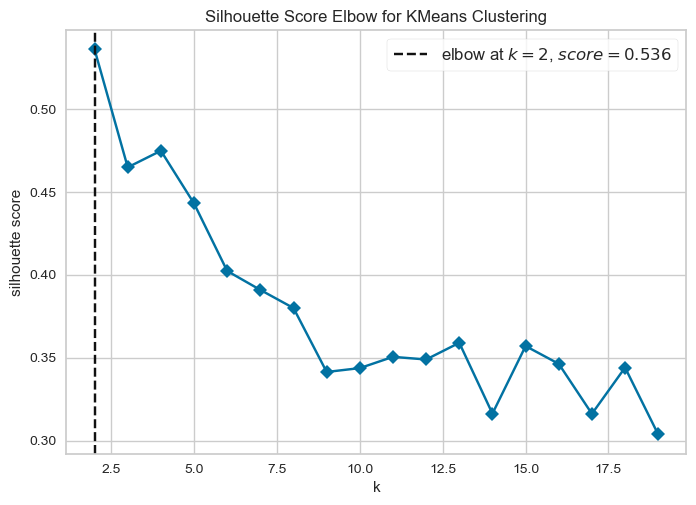

In [59]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(minmax_df)    
visualizer.poof()
plt.show()

In [60]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    sil_score1= sil(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.535888544052936
For n_clusters = 3 The average silhouette_score is : 0.46479982811211207
For n_clusters = 4 The average silhouette_score is : 0.47479527849897574
For n_clusters = 5 The average silhouette_score is : 0.4429787795230887
For n_clusters = 6 The average silhouette_score is : 0.4036935704266899
For n_clusters = 7 The average silhouette_score is : 0.3902543534131159
For n_clusters = 8 The average silhouette_score is : 0.3800928436109383
For n_clusters = 9 The average silhouette_score is : 0.38422218036747746


For n_clusters = 2 The average silhouette_score is : 0.535888544052936
For n_clusters = 3 The average silhouette_score is : 0.46479982811211207
For n_clusters = 4 The average silhouette_score is : 0.47479527849897574
For n_clusters = 5 The average silhouette_score is : 0.4429787795230887
For n_clusters = 6 The average silhouette_score is : 0.40225452242902543
For n_clusters = 7 The average silhouette_score is : 0.3908365897205473
For n_clusters = 8 The average silhouette_score is : 0.379901520230827
For n_clusters = 9 The average silhouette_score is : 0.3413462044075975


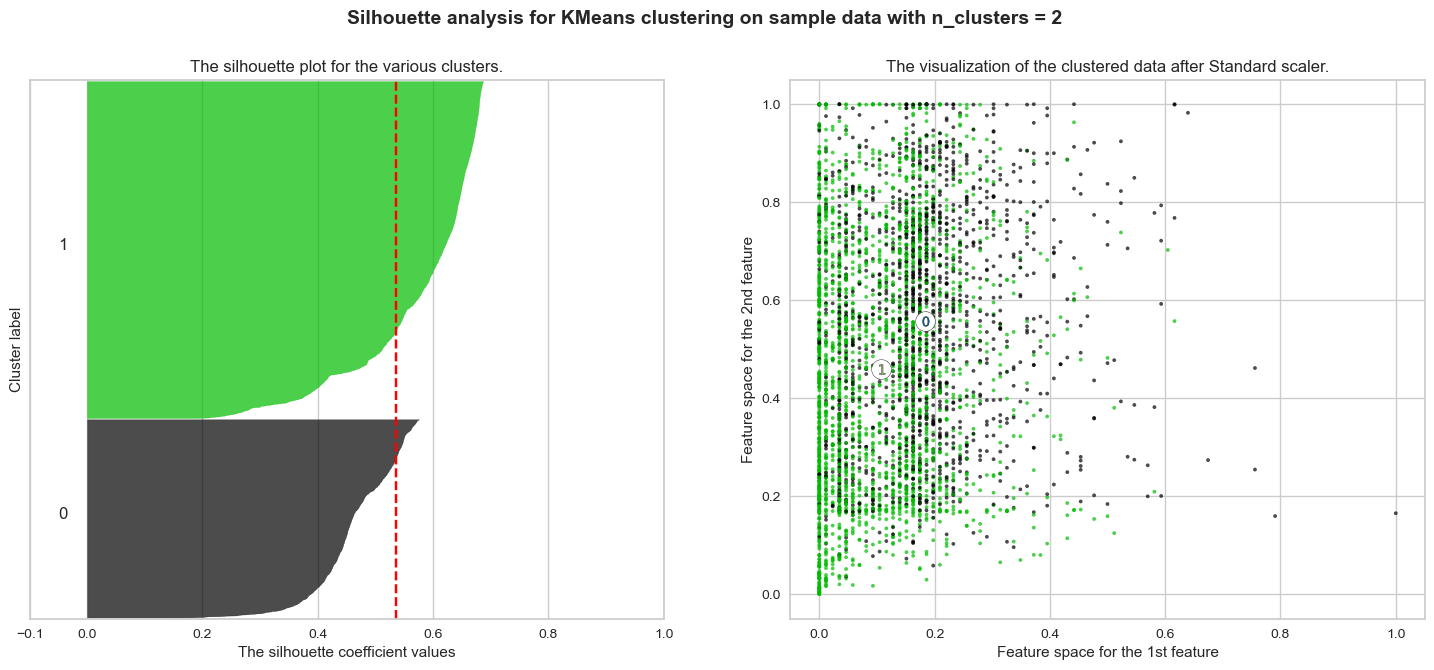

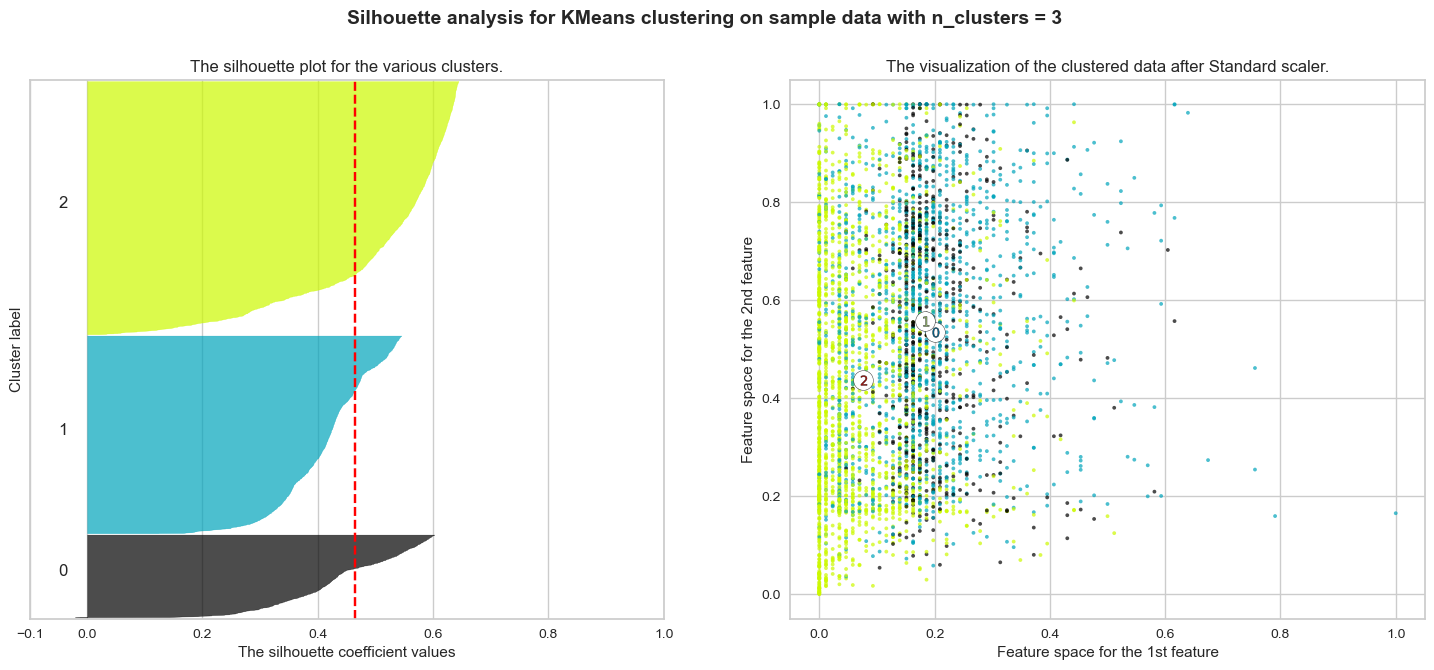

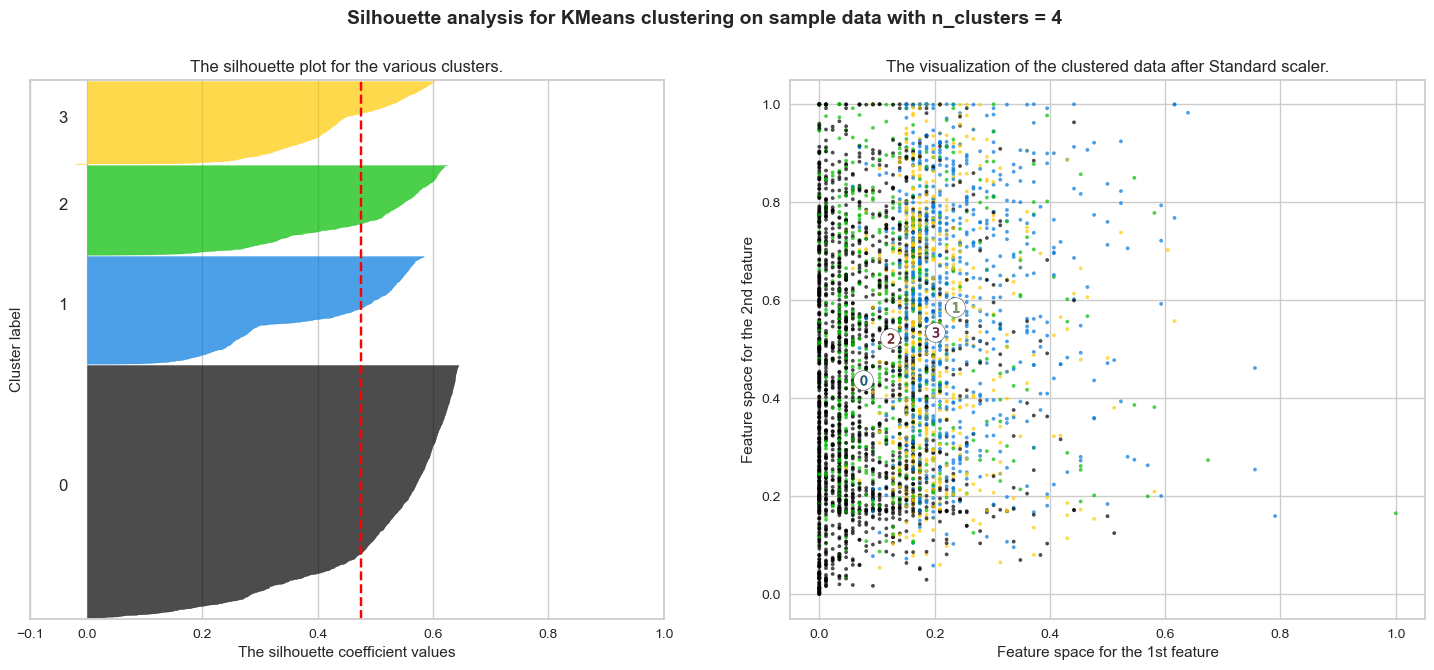

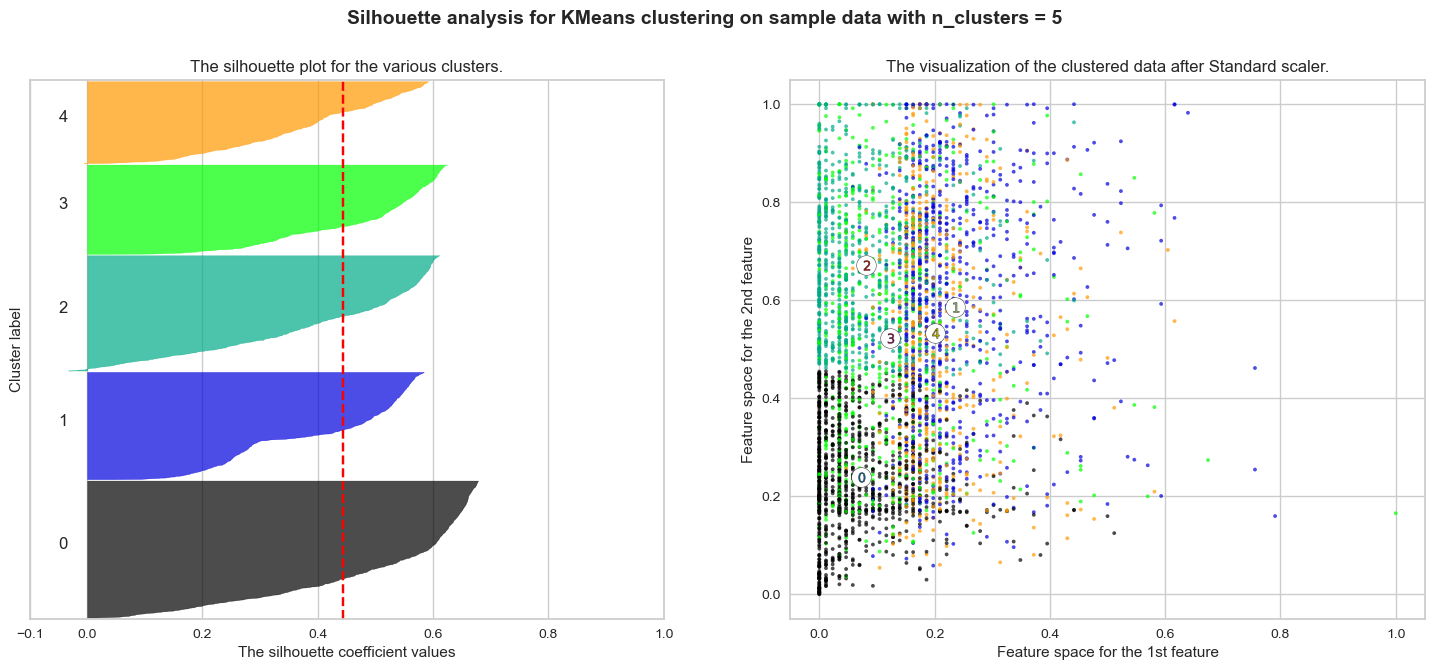

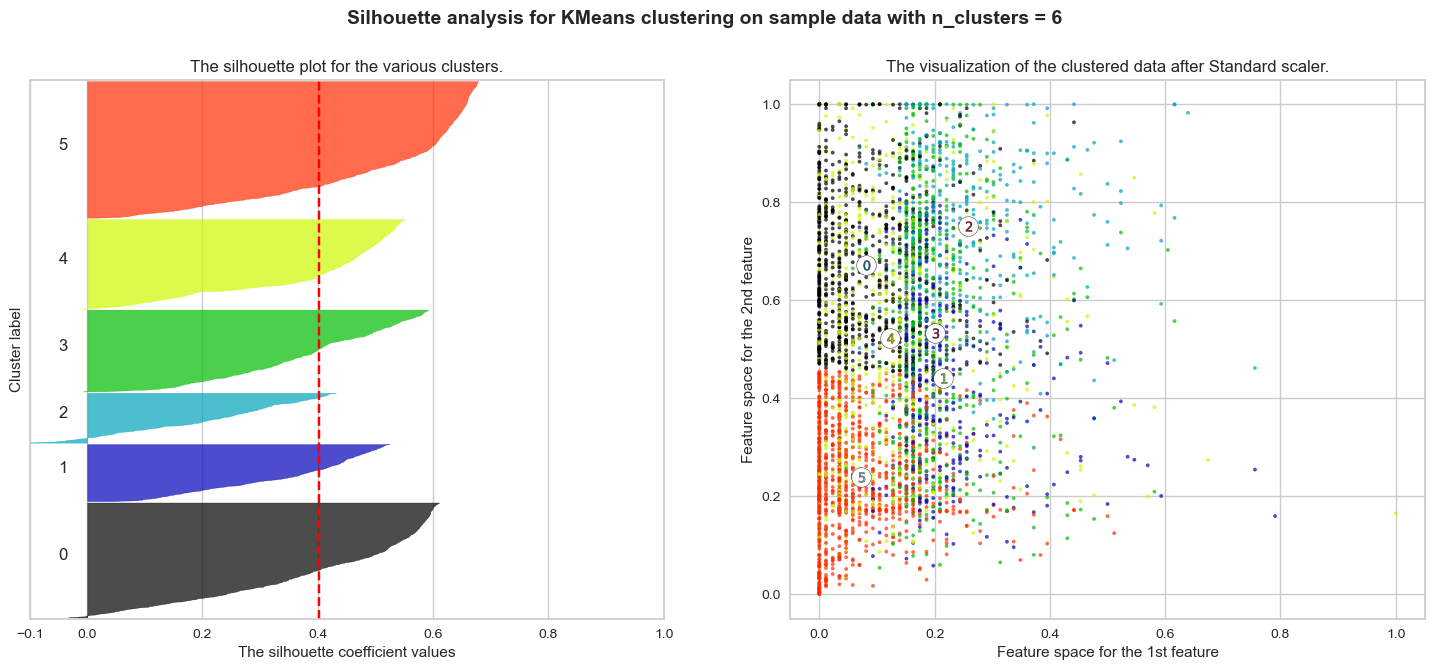

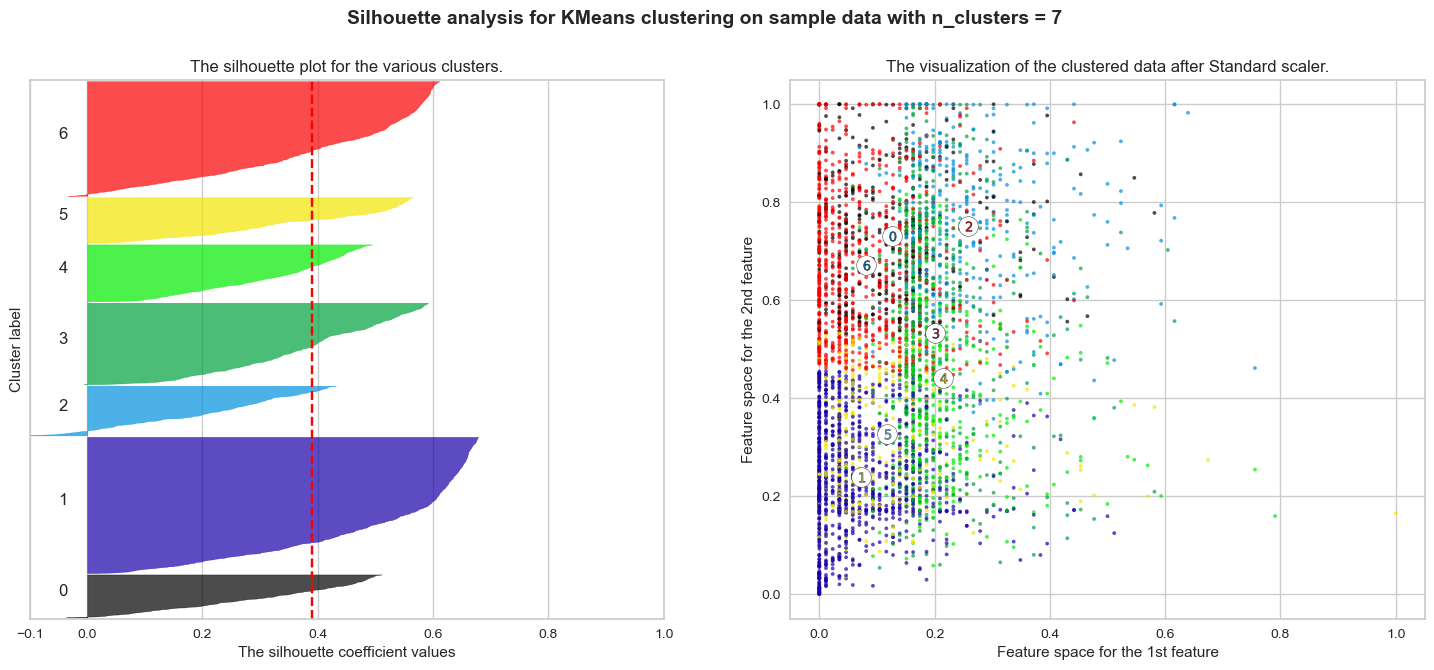

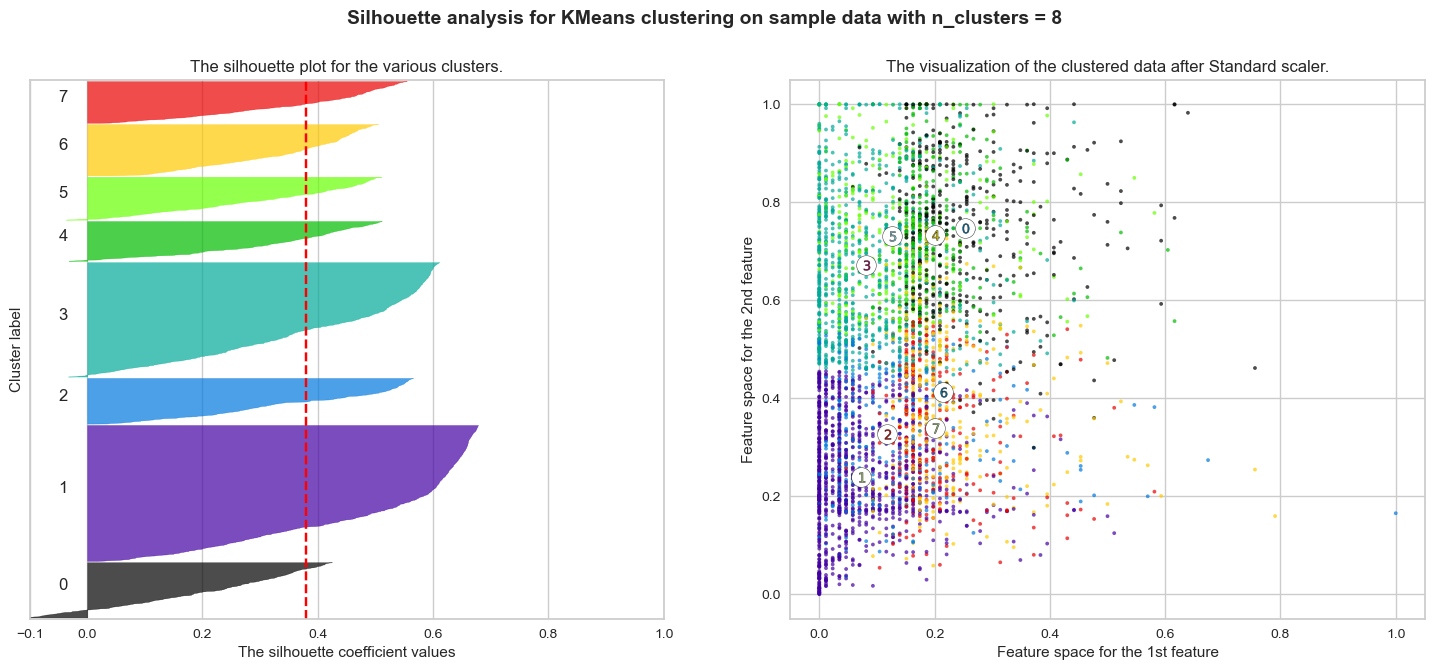

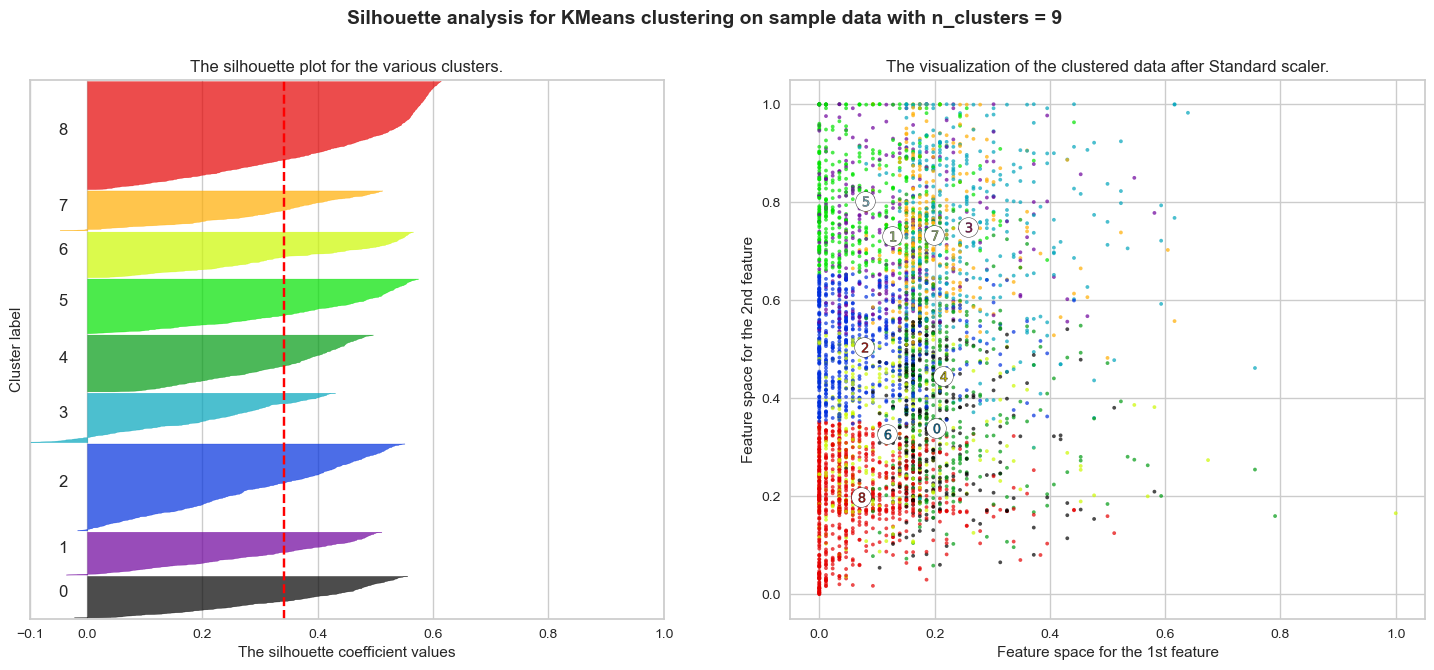

In [61]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(minmax_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(minmax_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(minmax_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(minmax_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(minmax_df[:,6], minmax_df[:,9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,6], centers[:,9], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Conclusion:
According the the silhouette score of:

The MinMax Scaler Applied data, the ideal number of clusters is 2, with a score higher than other options, of 0.53, but if you notice the number of cluster 5 has also the best variation within cluster and between cluster with zero to no values going towards -1 and no mismatch in cluster segregation than the consecutive rest

If we check silhouette score with Normalize data kmeans model 0.53>0.32. Best score always close to +1.

Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset

In [62]:
# we have found good number of cluster = 2
# model building using cluster numbers = 2

model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(3998,)

In [63]:
# these are nothing but cluster labels...

y_predict_kmeans

array([1, 1, 1, ..., 0, 1, 1])

In [64]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [65]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[ 5.69280197e-02,  2.15461508e-02,  4.15428764e-01,
         7.76502363e-03,  4.55773126e-03,  1.09621005e-01,
         1.83518364e-01,  2.78255837e-02,  4.90489598e-02,
         5.57398375e-01,  1.00000000e+00],
       [ 3.50949497e-02,  7.86125463e-03,  1.76400477e-01,
         6.95272149e-03,  2.18514104e-03,  3.88029372e-02,
         1.06355850e-01,  7.34601684e-03,  1.23162495e-02,
         4.60517912e-01, -3.38618023e-15]])

In [66]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

823.5583625482057

In [67]:
#Assign clusters to the data set
data['Kmeans_label'] = model_kmeans.labels_

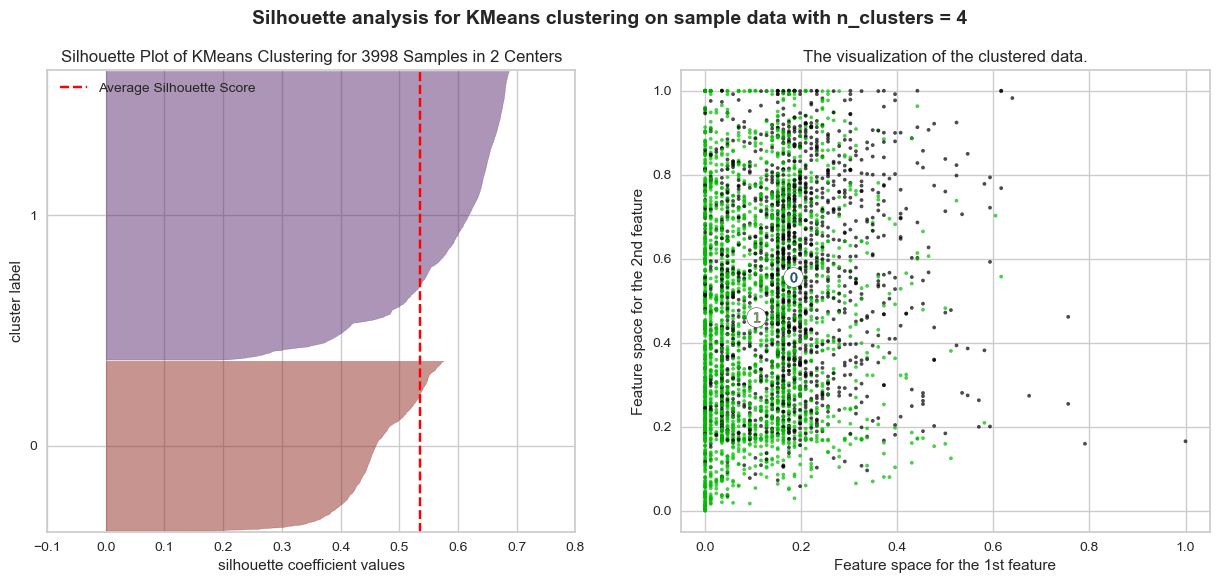

In [68]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(minmax_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 2 is number of clusters
ax2.scatter(minmax_df[:, 6], minmax_df[:, 9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 4),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

In [69]:
# Group data by Clusters (K=2)
data.groupby('Kmeans_label').agg(['mean'])

Balance  Qual_miles cc1_miles cc2_miles cc3_miles  \
                      mean        mean      mean      mean      mean   
Kmeans_label                                                           
0             97053.051317  240.196489  2.661715  1.015530  1.018231   
1             59831.203814  87.637267   1.705602  1.013905  1.008741   

               Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
                      mean        mean              mean            mean   
Kmeans_label                                                               
0             28905.414585  15.782579   857.501013        2.599595         
1             10231.752483  9.146603    226.382201        0.652761         

             Days_since_enroll Award  
                          mean  mean  
Kmeans_label                          
0             4625.062120       1.0   
1             3821.535558       0.0

We can now clearly see the 2 number of clusters formed, which can be described as under
Cluster1, Tier 1 = "1" = Defines the group of fliers that earn the most out of the card and are frequent fliers
Cluster0, Tier 2 = "0" = Defines the group of fliers that earn the least and are the least frequent fliers


# Dendogram on MinMaxScaler Applied on Dataset

In [70]:
import matplotlib.pyplot as plt

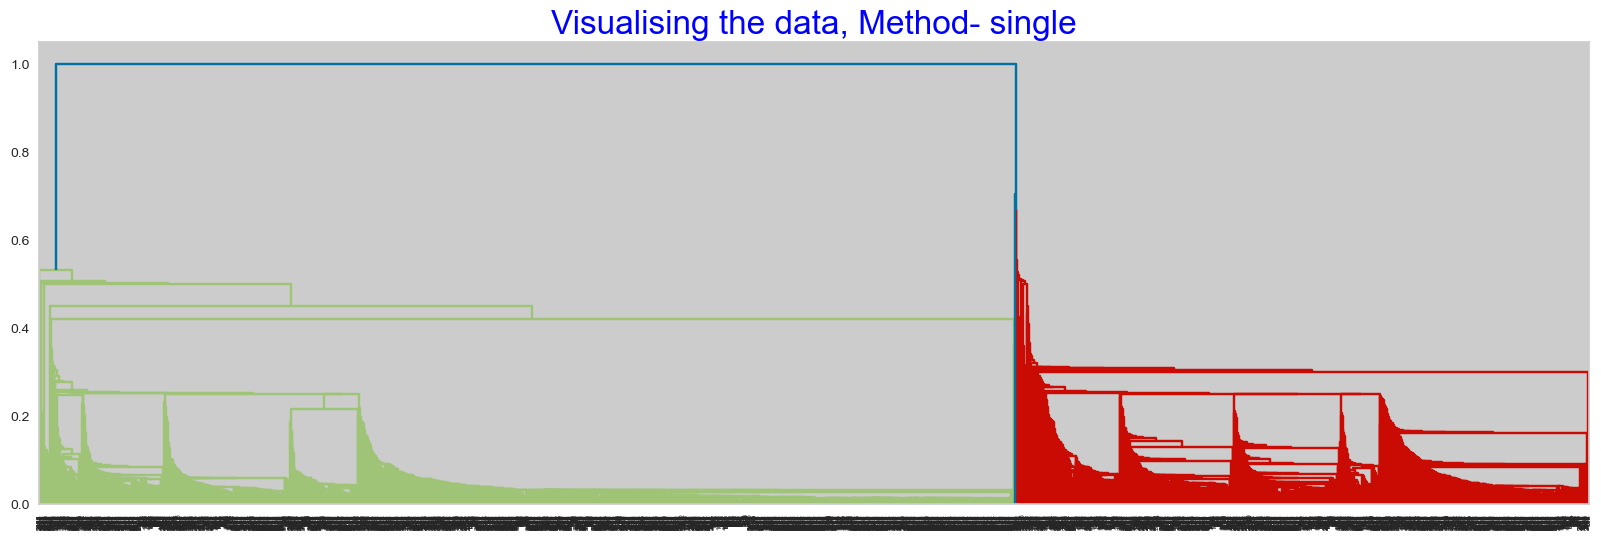

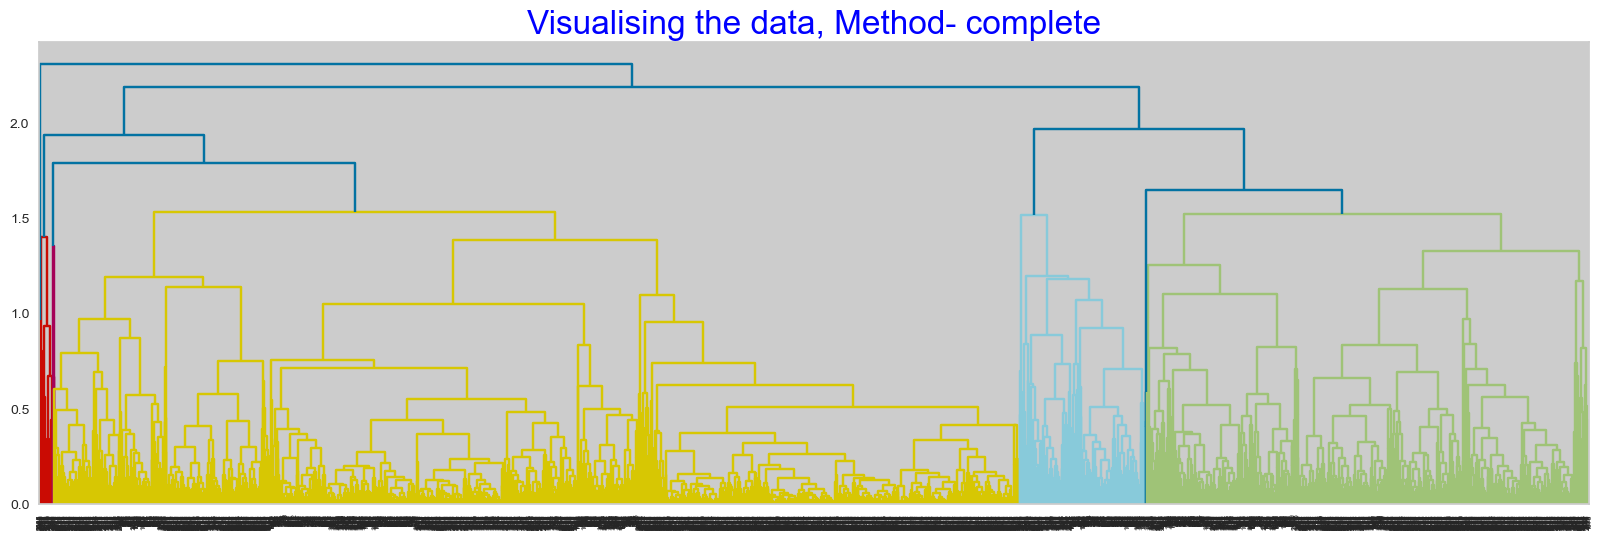

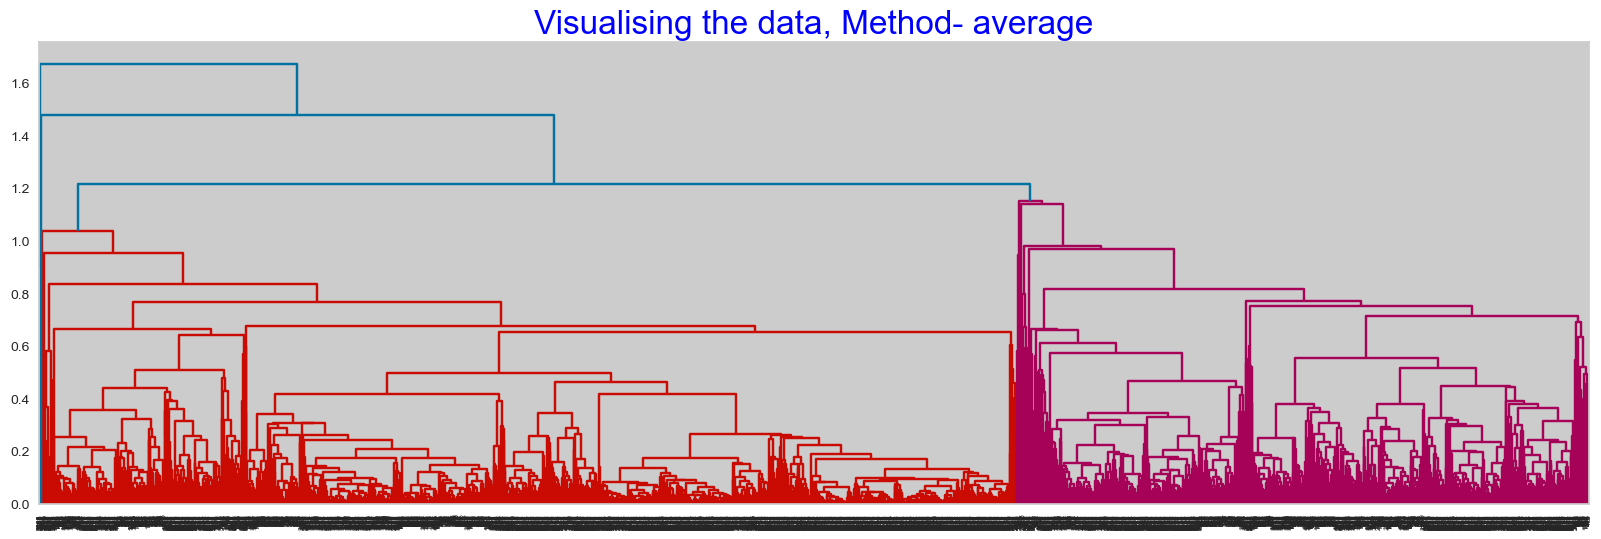

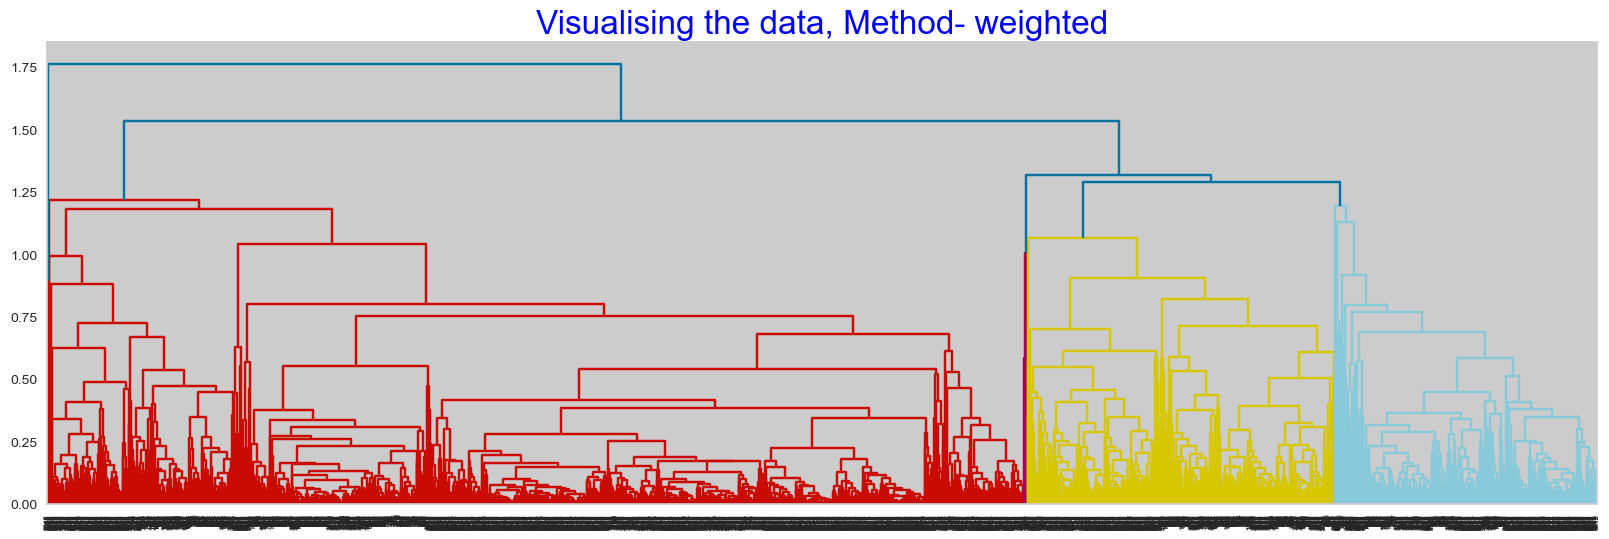

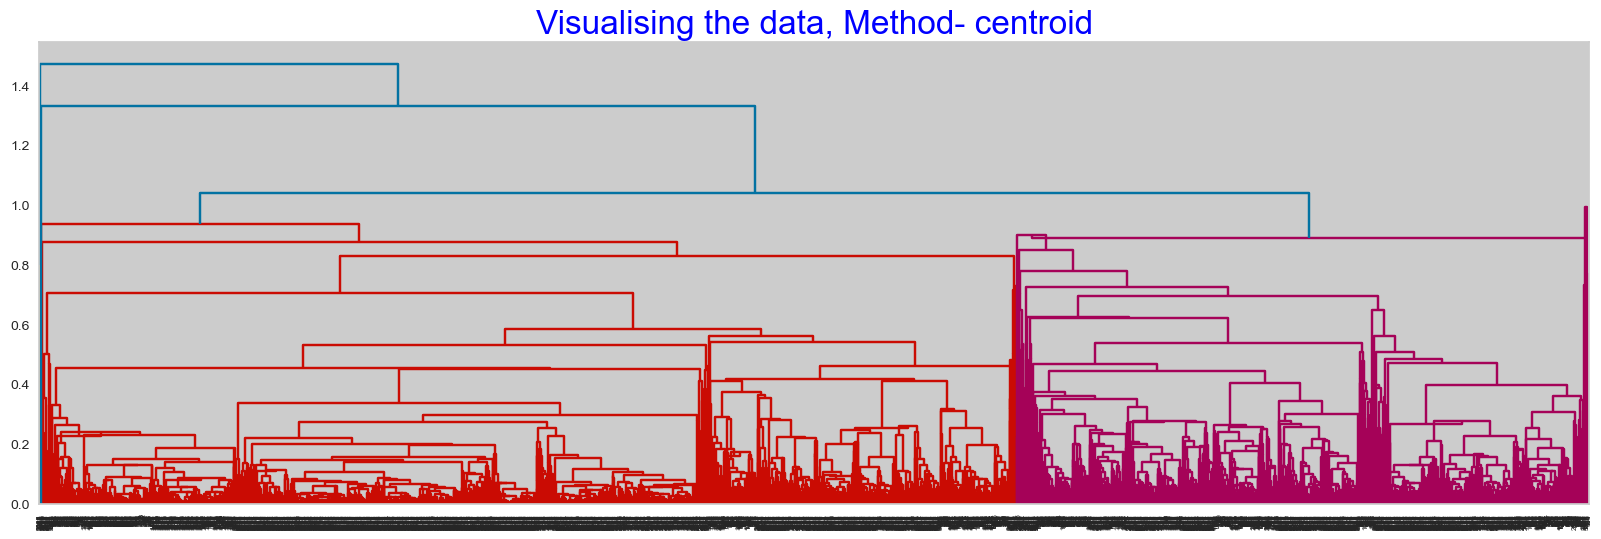

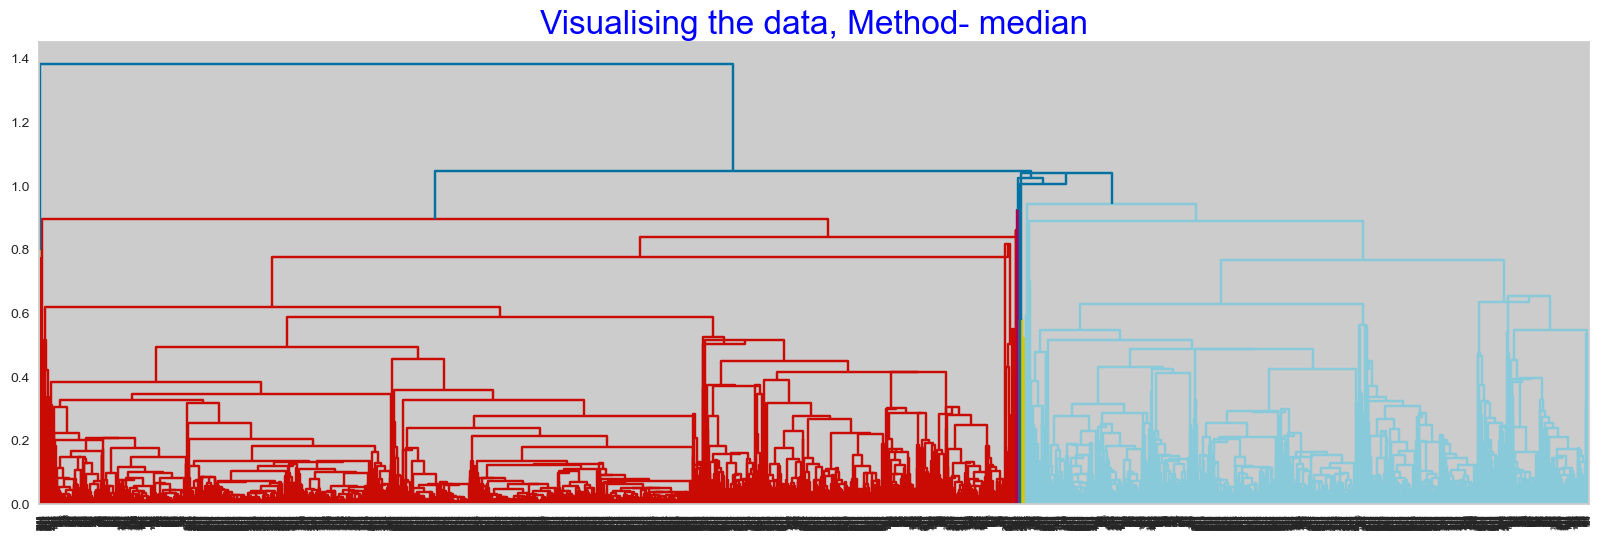

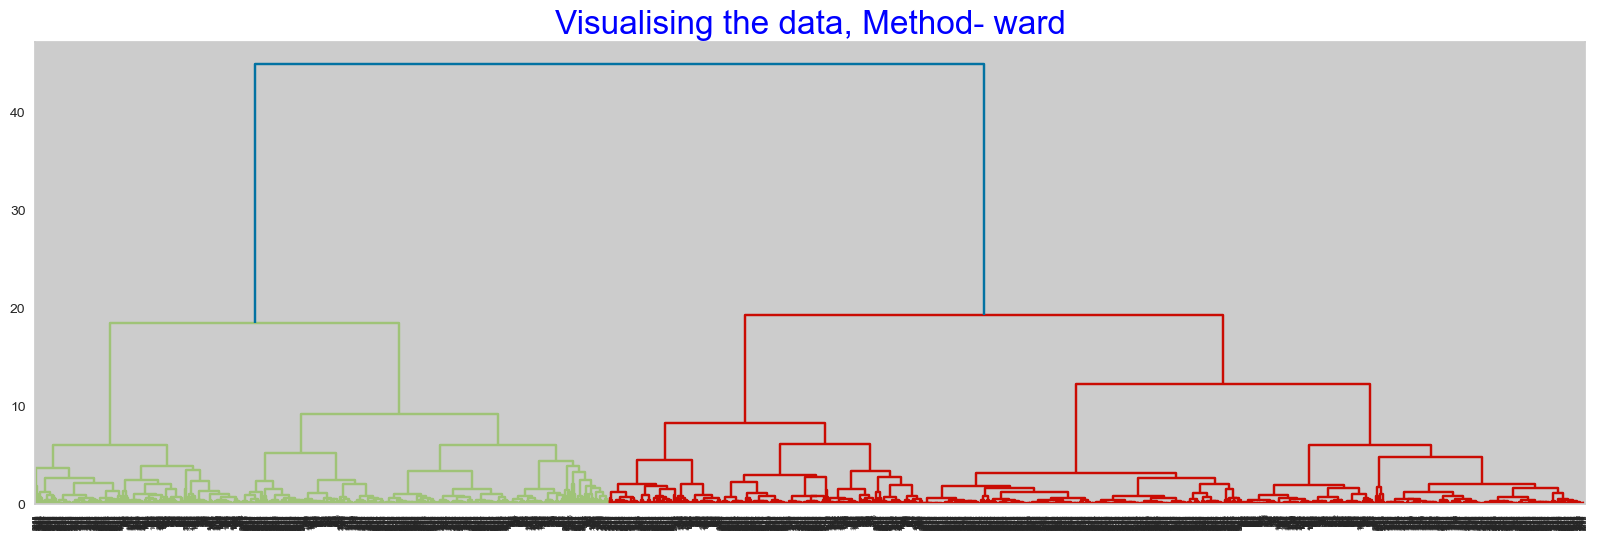

In [71]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [72]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535888544052936
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535888544052936

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4354523188194701
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318364582439801
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3961439228235289
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351186081149816

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42489181550394106
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4645451427805366
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5285595526639542
For n_

In [73]:
#Conclusion: Max score is with cluster numbers 2 in standard scaler transformation and in Min Max scaler transformation.

# PCA

In [74]:
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [75]:
# eigenvalues..

print(pca_std.singular_values_)

[114.59929366  83.12095737  64.93711956  63.52257567  61.95910679
  60.39325992  56.7960262   49.8137685   37.95289819]


In [76]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[29.8626543  15.71034052  9.58849765  9.17530952  8.72920759  8.29356916
  7.33500521  5.64239286  3.27532512]


In [77]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([29.8626543 , 45.57299482, 55.16149247, 64.33680198, 73.06600957,
       81.35957873, 88.69458394, 94.3369768 , 97.61230192])

In [78]:
#Conclusion:
#by applying PCA on standardized data with 95% variance it gives 9 PCA components.##

Silhouette Score method for PCA Standard Scaled Data

In [79]:
n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = sil(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.19961390517290706
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8108617312271154
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8108617312271154
For n_clusters = 2 The average silhouette_score with linkage- single : 0.7383094547145751

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.21104413292128157
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7783994853820994
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7857918595410374
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7380319163788159

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.2149786632607184
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.668529354061089
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7754426734642428
For 

Run Hierarchical Clustering.(Agglomerative Clustering)

In [80]:
from sklearn.cluster import AgglomerativeClustering


In [81]:
agg_clustering = AgglomerativeClustering(n_clusters=10)
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3998,)


array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [82]:
# Cluster numbers

agg_clustering.n_clusters_

10

In [83]:
# Clustering Score

(sil(pca_std_df, agg_clustering.labels_)*100).round(3)

28.488

Putting Cluster lables into original dataset And analysis of the same

In [84]:
# Concating Labels with main dataset copy

data['Hierarchical_labels'] = agg_clustering.labels_
data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                      
1   28143    0           1          1          1          174           
2   19244    0           1          1          1          215           
3   41354    0           1          1          1          4123          
4   14776    0           1          1          1          500           
5   97752    0           4          1          1          43300         

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
ID                                                                              
1   1            0                  0                7000               0       
2   2            0                  0                6968               0       
3   4            0                  0                7034               0       
4   1            0                  0                6952               0       
5   26           2077               4                6935               1       

    Kmeans_label  Hierarchical_labels  
ID                                     
1   1             0                    
2   1             0                    
3   1             0                    
4   1             0                    
5   0             7

In [85]:
data.groupby('Hierarchical_labels').agg(['mean'])


Balance   Qual_miles cc1_miles cc2_miles cc3_miles  \
                              mean         mean      mean      mean      mean   
Hierarchical_labels                                                             
0                    35565.475331   1.895909     1.071600  1.000000  1.000000   
1                    106691.116046  9.482808     3.249284  1.000000  1.000000   
2                    59183.817881   34.030905    2.355408  1.000000  1.000000   
3                    68876.581395   23.255814    1.139535  2.348837  1.000000   
4                    129951.388889  65.666667    3.388889  1.000000  3.722222   
5                    145767.807692  483.692308   2.576923  1.000000  1.000000   
6                    107778.330769  3553.684615  1.884615  1.000000  1.000000   
7                    123897.501873  59.329588    4.464419  1.000000  1.000000   
8                    82556.378698   117.325444   1.035503  1.000000  1.000000   
9                    626516.283019  202.452830   3.698113  1.000000  1.000000   

                      Bonus_miles Bonus_trans Flight_miles_12mo  \
                             mean        mean              mean   
Hierarchical_labels                                               
0                    2692.451264   5.929603    98.201564          
1                    27320.199140  16.641834   185.707736         
2                    18106.241722  11.897351   183.070640         
3                    14689.837209  17.534884   582.627907         
4                    86259.888889  26.222222   422.222222         
5                    41204.115385  35.596154   8882.211538        
6                    17001.907692  11.276923   764.107692         
7                    66245.951311  24.352060   1014.719101        
8                    8169.911243   11.946746   2757.295858        
9                    56755.566038  20.415094   948.886792         

                    Flight_trans_12 Days_since_enroll     Award Kmeans_label  
                               mean              mean      mean         mean  
Hierarchical_labels                                                           
0                    0.332732        3485.887485       0.008424  0.991576     
1                    0.547278        4667.399713       0.000000  1.000000     
2                    0.584989        4365.253863       1.000000  0.000000     
3                    2.209302        3968.930233       0.395349  0.604651     
4                    1.333333        4488.777778       0.500000  0.500000     
5                    23.326923       4557.961538       0.865385  0.134615     
6                    2.384615        4091.761538       0.530769  0.469231     
7                    3.112360        5494.797753       0.988764  0.011236     
8                    8.047337        3710.431953       0.680473  0.319527     
9                    3.679245        6559.113208       0.792453  0.207547

Running PCA of MinMaxscalar data.

In [86]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_data = pca_minmax.fit_transform(minmax_df)

In [87]:
# eigenvalues..

print(pca_minmax.singular_values_)

[32.61283384 20.38274997 14.94964196  6.55127594]


In [88]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

[58.10519044 22.69673608 12.20954379  2.34471271]


Conclusion:
By applying PCA on MinMaxscalr transformation data gives 4 PCA components.

# Silhouette Score method for PCA MinMax Scaled Data

In [89]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(pca_minmax_data)
        silhouette_score2 = sil(pca_minmax_data, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.557020311332076
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.45062835604506785
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4746720886833245
For n_clusters = 2 The average silhouette_score with linkage- single : 0.557020311332076

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4668018757689698
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5527079342536562
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5545201621845232
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5557695658754247

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.4605211923296597
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.509491332840777
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4979294044354527
For n_c

Conclusion: Max score is with cluster numbers 2 for ward and mostly others.

# Run Hierarchical Clustering.(Agglomerative Clustering)

In [90]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(pca_minmax_data)
print(y_pred_hie.shape)
y_pred_hie

(3998,)


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [91]:
# Cluster numbers

agg_clustering.n_clusters_

2

In [92]:
# Clustering Score

(sil(pca_minmax_data, agg_clustering.labels_)*100).round(3)

55.702

# Putting Cluster lables into original dataset And analysis of the same

In [93]:
# Concating Labels with main dataset copy

data['Hierarchical_labels'] = agg_clustering.labels_
data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                      
1   28143    0           1          1          1          174           
2   19244    0           1          1          1          215           
3   41354    0           1          1          1          4123          
4   14776    0           1          1          1          500           
5   97752    0           4          1          1          43300         

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
ID                                                                              
1   1            0                  0                7000               0       
2   2            0                  0                6968               0       
3   4            0                  0                7034               0       
4   1            0                  0                6952               0       
5   26           2077               4                6935               1       

    Kmeans_label  Hierarchical_labels  
ID                                     
1   1             0                    
2   1             0                    
3   1             0                    
4   1             0                    
5   0             1

In [94]:
data.groupby('Hierarchical_labels').agg(['mean'])


Balance  Qual_miles cc1_miles cc2_miles cc3_miles  \
                             mean        mean      mean      mean      mean   
Hierarchical_labels                                                           
0                    59831.203814  87.637267   1.705602  1.013905  1.008741   
1                    97053.051317  240.196489  2.661715  1.015530  1.018231   

                      Bonus_miles Bonus_trans Flight_miles_12mo  \
                             mean        mean              mean   
Hierarchical_labels                                               
0                    10231.752483  9.146603    226.382201         
1                    28905.414585  15.782579   857.501013         

                    Flight_trans_12 Days_since_enroll Award Kmeans_label  
                               mean              mean  mean         mean  
Hierarchical_labels                                                       
0                    0.652761        3821.535558       0.0   1.0          
1                    2.599595        4625.062120       1.0   0.0

# DBSCAN - (Density Based Spatial Clustering of Applications with Noise)

In [95]:
from itertools import product

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [96]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


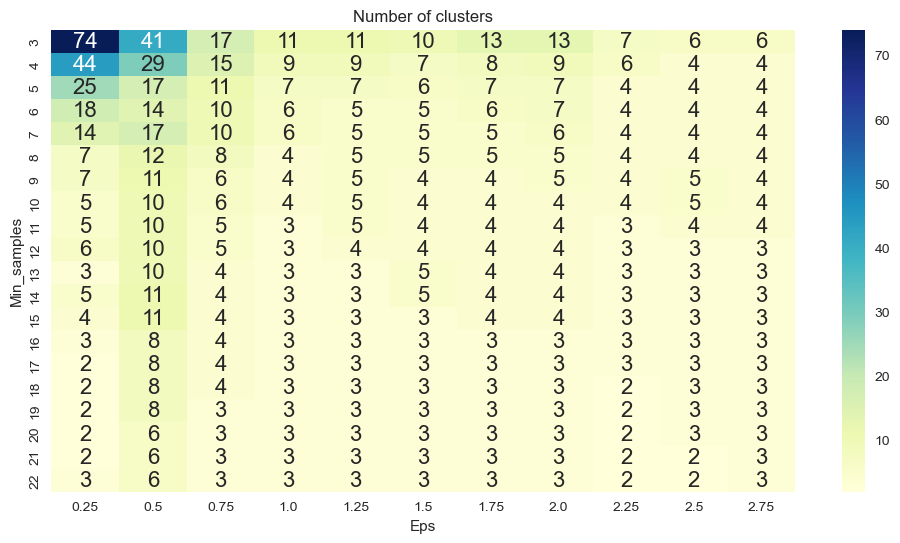

In [97]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

In [98]:
#As the heatplot above shows, the number of clusters vary from 74 to 2.

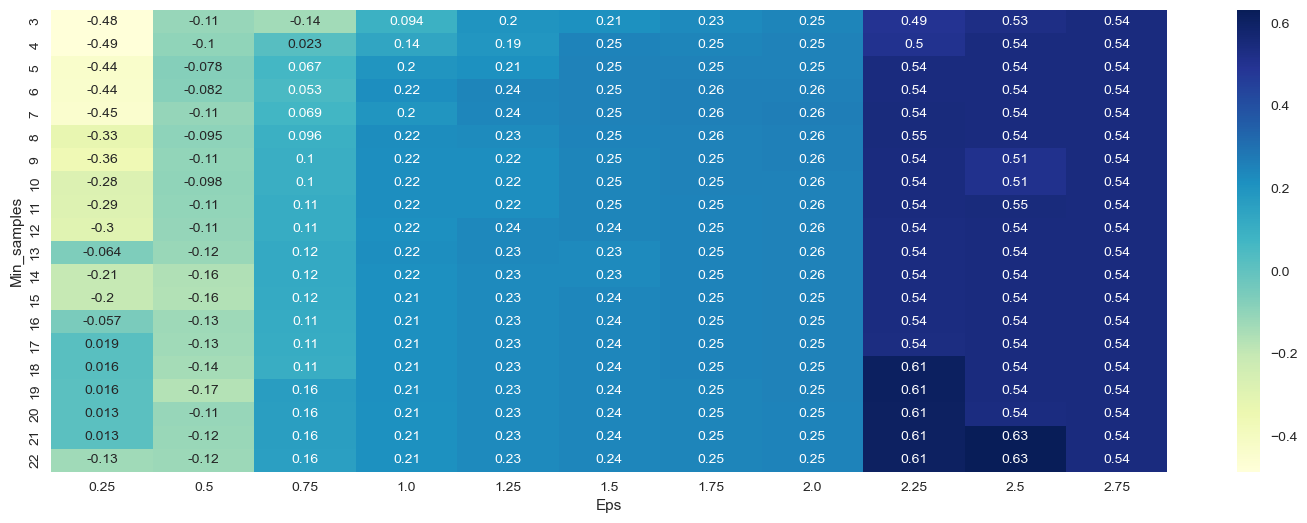

In [99]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [100]:
#Global maximum is 0.63 for eps=2.5 and min_samples=21 and 22

In [103]:
epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 2.5 
min_sample= 21 
number of clusters= 1 
average silhouette score= 0.6319


Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

In [102]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_df)

DBSCAN(eps=2.5, min_samples=21)

In [104]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
# -1 are the noise points in our dataset and the rest are the clusters


In [107]:
# Concating Labels with main dataset copy

data['DBSCAN_labels'] = dbscan.labels_
data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                      
1   28143    0           1          1          1          174           
2   19244    0           1          1          1          215           
3   41354    0           1          1          1          4123          
4   14776    0           1          1          1          500           
5   97752    0           4          1          1          43300         

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
ID                                                                              
1   1            0                  0                7000               0       
2   2            0                  0                6968               0       
3   4            0                  0                7034               0       
4   1            0                  0                6952               0       
5   26           2077               4                6935               1       

    Kmeans_label  Hierarchical_labels  DBSCAN_labels  
ID                                                    
1   1             0                    0              
2   1             0                    0              
3   1             0                    0              
4   1             0                    0              
5   0             1                    0

In [108]:
data.groupby('DBSCAN_labels').agg(['mean'])


Balance   Qual_miles cc1_miles cc2_miles cc3_miles  \
                        mean         mean      mean      mean      mean   
DBSCAN_labels                                                             
-1             211990.889423  1522.576923  2.509615  1.278846  1.235577   
 0             66025.489182   68.500792    2.035092  1.000000  1.000000   

                Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
                       mean        mean              mean            mean   
DBSCAN_labels                                                               
-1             45335.081731  24.754808   3276.389423       9.548077         
 0             15602.254090  10.883113   305.613193        0.925330         

              Days_since_enroll     Award Kmeans_label Hierarchical_labels  
                           mean      mean         mean                mean  
DBSCAN_labels                                                               
-1             4768.596154       0.687500  0.312500     0.687500            
 0             4083.549868       0.353034  0.646966     0.353034

# DBSCAN on MinMax Scaled Data


In [109]:
#To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.


In [110]:
from itertools import product

eps_values = np.arange(0.25,1.25,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [111]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(minmax_df, DBS_clustering.labels_))

In [112]:
#Collecting number of generated clusters.


A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


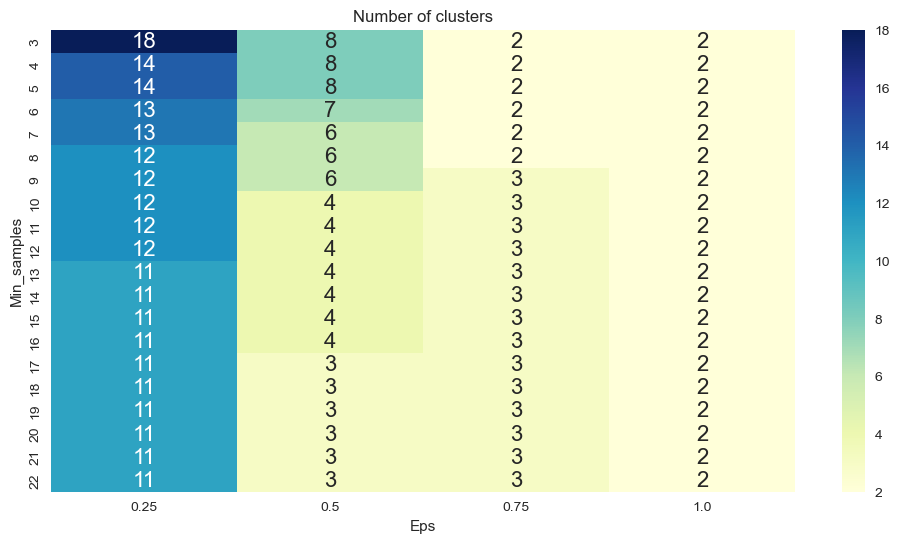

In [113]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

In [114]:
#As the heatplot above shows, the number of clusters vary from 18 to 2.


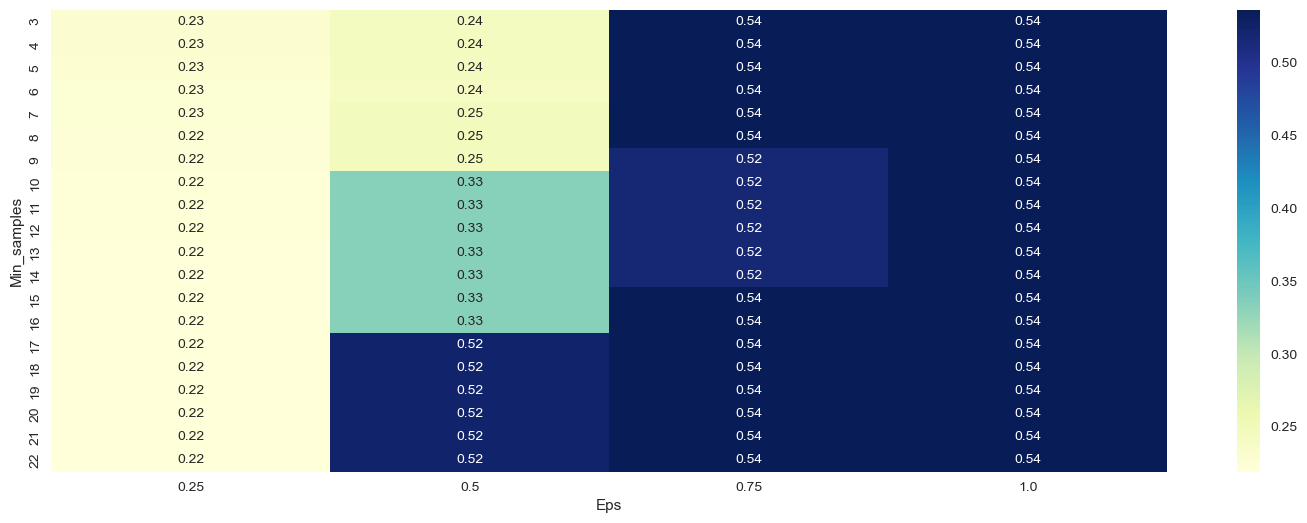

In [115]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [116]:
#Global maximum is 0.54 for eps=1.0 and min_samples=from 22 to 3


In [117]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.5359


In [118]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [3,4,5,6,7,8,9,10,11]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.75 
min_sample= 3 
number of clusters= 2 
average silhouette score= 0.5359


Run DBSCAN on MinMax Scaled data with optimal min_sample and epsilon values


In [119]:
dbscan = DBSCAN(eps=1, min_samples=22) # min_samples = number of clumns * 3
dbscan.fit(minmax_df)

DBSCAN(eps=1, min_samples=22)

In [120]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [121]:
# -1 are the noise points in our dataset and the rest are the clusters

In [122]:
# Concating Labels with main dataset copy

data['DBSCAN_labels'] = dbscan.labels_
data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                      
1   28143    0           1          1          1          174           
2   19244    0           1          1          1          215           
3   41354    0           1          1          1          4123          
4   14776    0           1          1          1          500           
5   97752    0           4          1          1          43300         

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
ID                                                                              
1   1            0                  0                7000               0       
2   2            0                  0                6968               0       
3   4            0                  0                7034               0       
4   1            0                  0                6952               0       
5   26           2077               4                6935               1       

    Kmeans_label  Hierarchical_labels  DBSCAN_labels  
ID                                                    
1   1             0                    0              
2   1             0                    0              
3   1             0                    0              
4   1             0                    0              
5   0             1                    1

In [123]:
data.groupby('DBSCAN_labels').agg(['mean'])


Balance  Qual_miles cc1_miles cc2_miles cc3_miles  \
                       mean        mean      mean      mean      mean   
DBSCAN_labels                                                           
0              59831.203814  87.637267   1.705602  1.013905  1.008741   
1              97053.051317  240.196489  2.661715  1.015530  1.018231   

                Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
                       mean        mean              mean            mean   
DBSCAN_labels                                                               
0              10231.752483  9.146603    226.382201        0.652761         
1              28905.414585  15.782579   857.501013        2.599595         

              Days_since_enroll Award Kmeans_label Hierarchical_labels  
                           mean  mean         mean                mean  
DBSCAN_labels                                                           
0              3821.535558       0.0   1.0          0.0                 
1              4625.062120       1.0   0.0          1.0

Conclusion:

In cluster number 0 & 1 there are more customers. Need to focus on cluster 0 & 1.

In [125]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(data.loc[data.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(data.loc[data.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [126]:
avg_data = pd.concat([cluster1,cluster2],axis=1)
avg_data

Cluster1_avg  Cluster2_avg
Balance              59831.203814  97053.051317
Qual_miles           87.637267     240.196489  
cc1_miles            1.705602      2.661715    
cc2_miles            1.013905      1.015530    
cc3_miles            1.008741      1.018231    
Bonus_miles          10231.752483  28905.414585
Bonus_trans          9.146603      15.782579   
Flight_miles_12mo    226.382201    857.501013  
Flight_trans_12      0.652761      2.599595    
Days_since_enroll    3821.535558   4625.062120 
Award                0.000000      1.000000    
Kmeans_label         1.000000      0.000000    
Hierarchical_labels  0.000000      1.000000    
DBSCAN_labels        0.000000      1.000000

Conclusion :

As decided need to focous on first two clusters.. Considering past Award status(0 or 1) cluster number2 shows award avg as 1 that means people awarded with scheme. Similarly for cluster number 2 award avg. is 0. Since avg is low that means now maximim award given to cluster number1 in the past. Need to add future schemes for cluster number two members on different bonus points & different card transaction bonus.

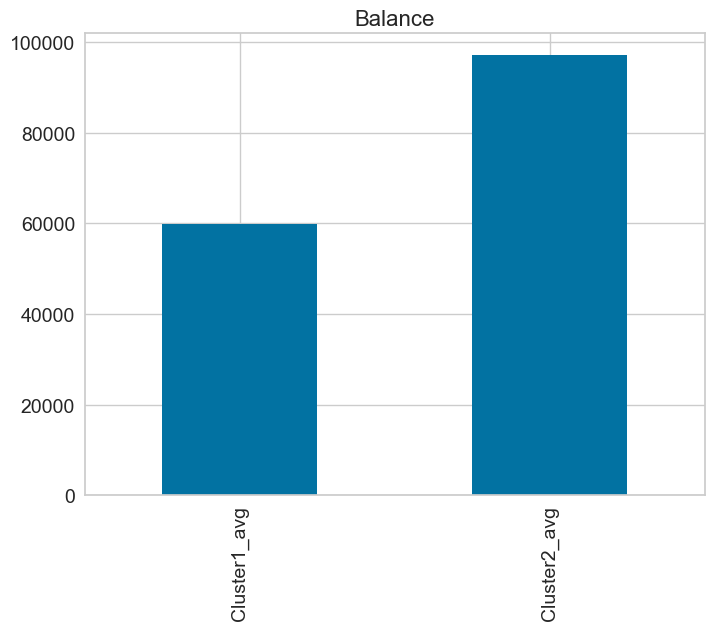

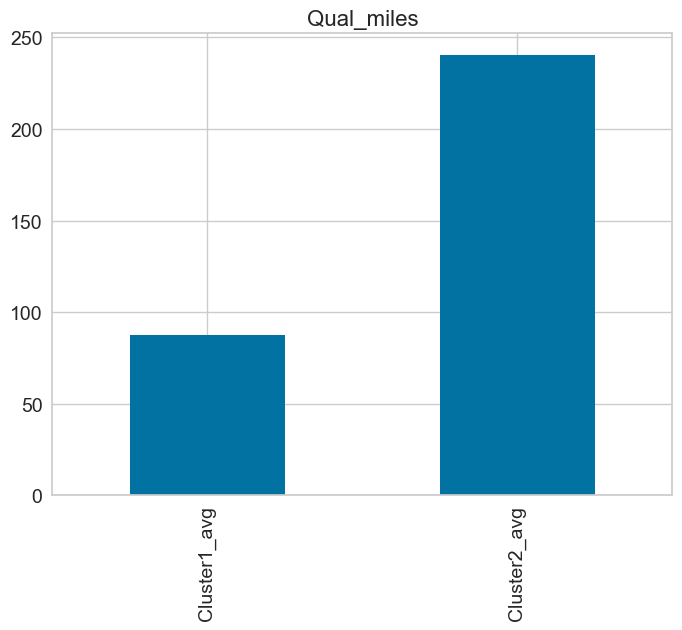

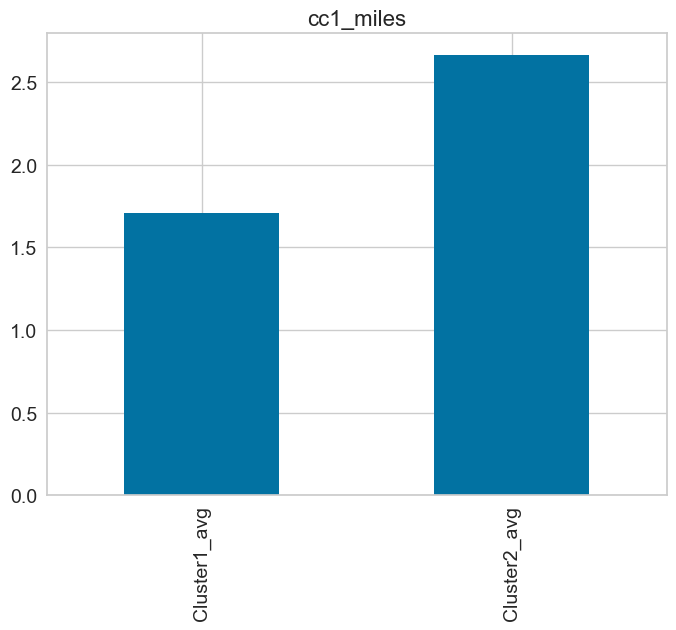

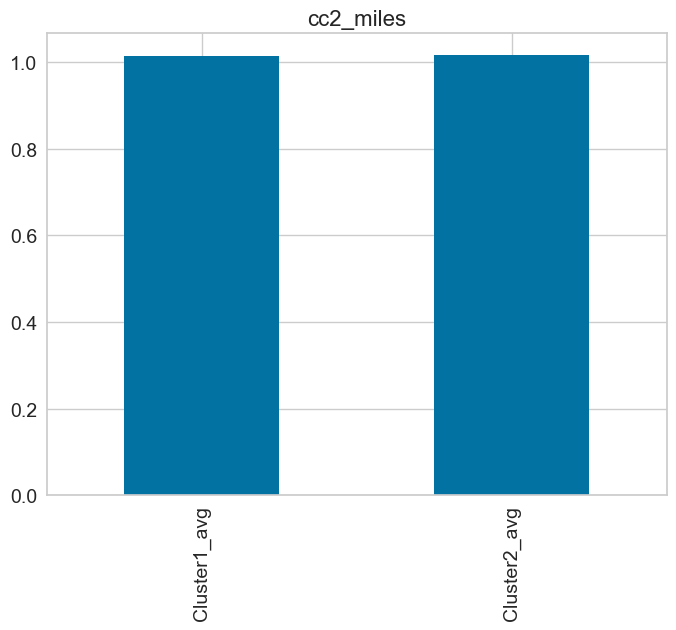

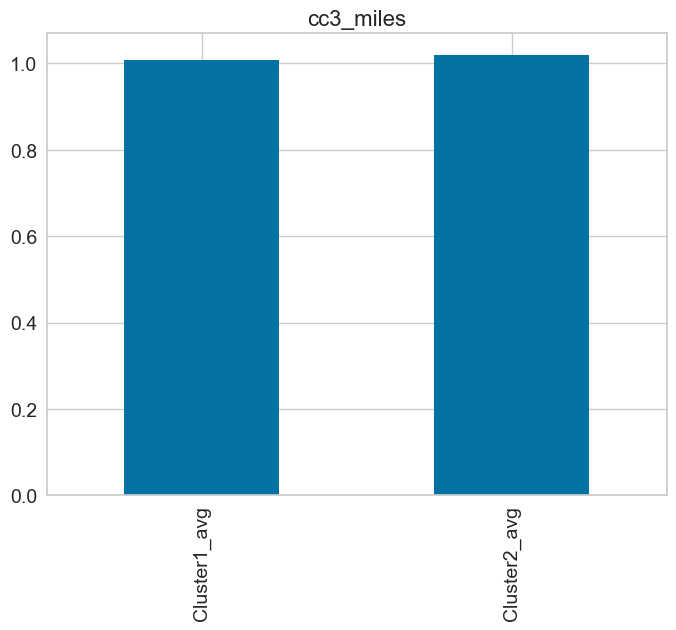

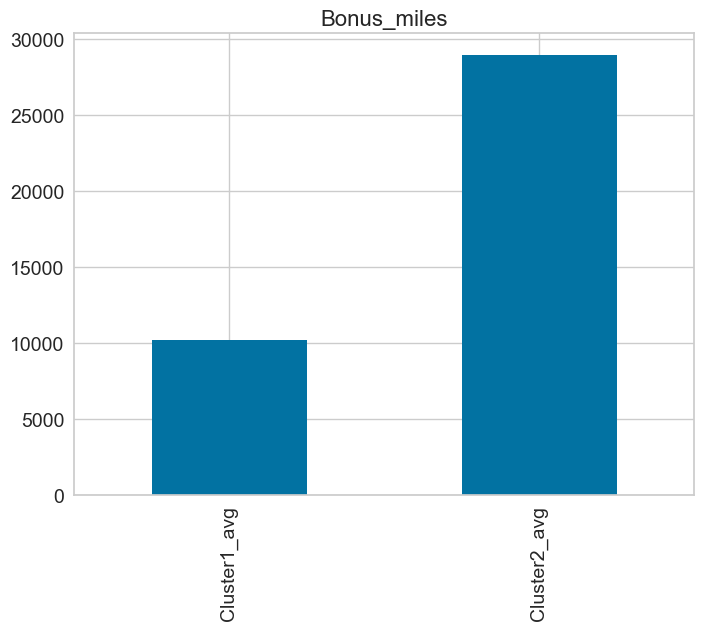

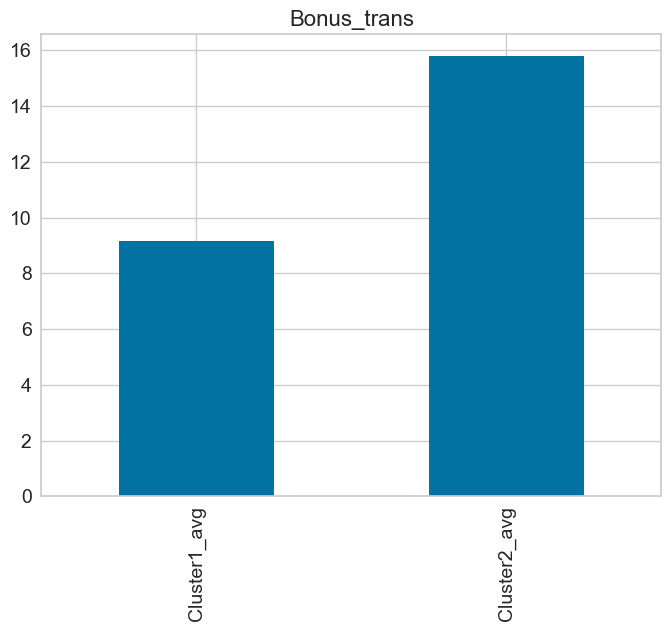

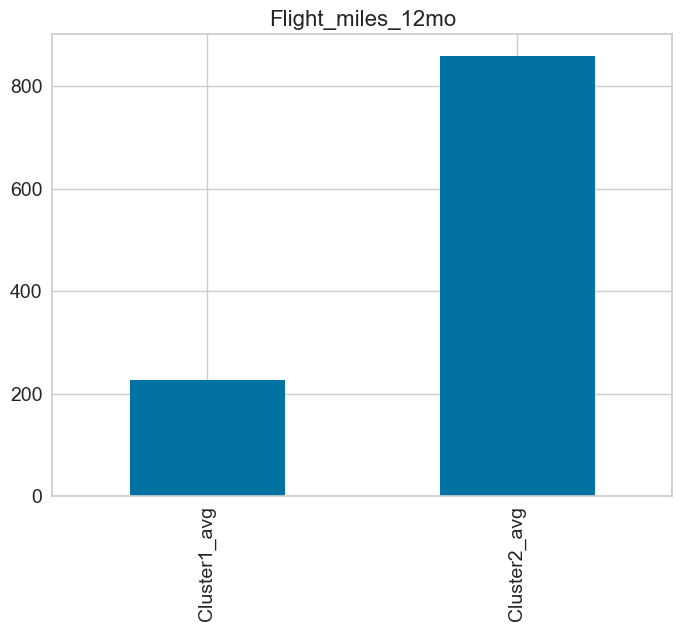

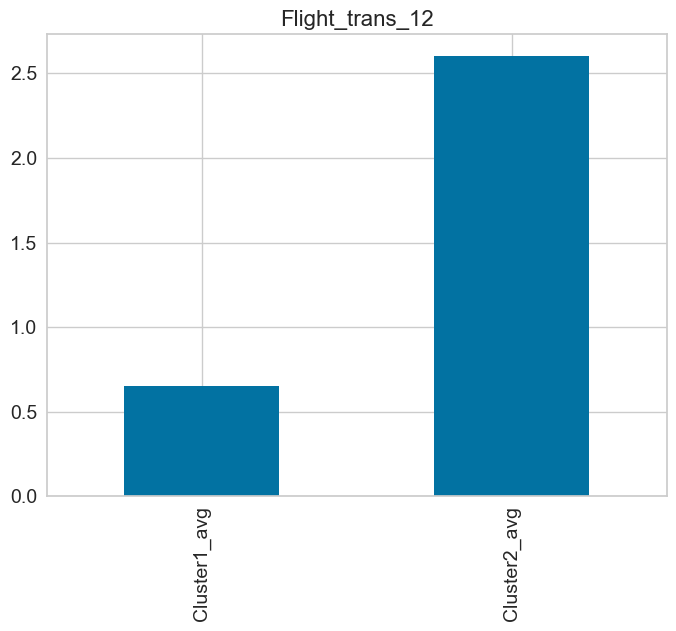

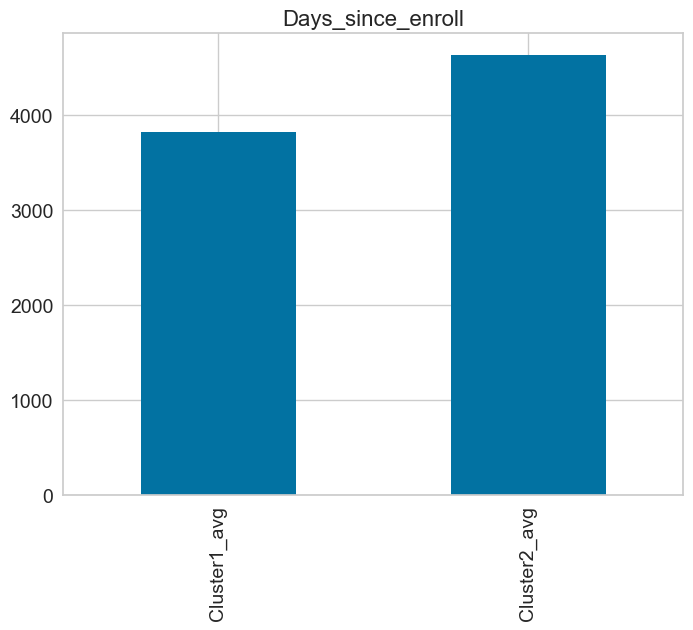

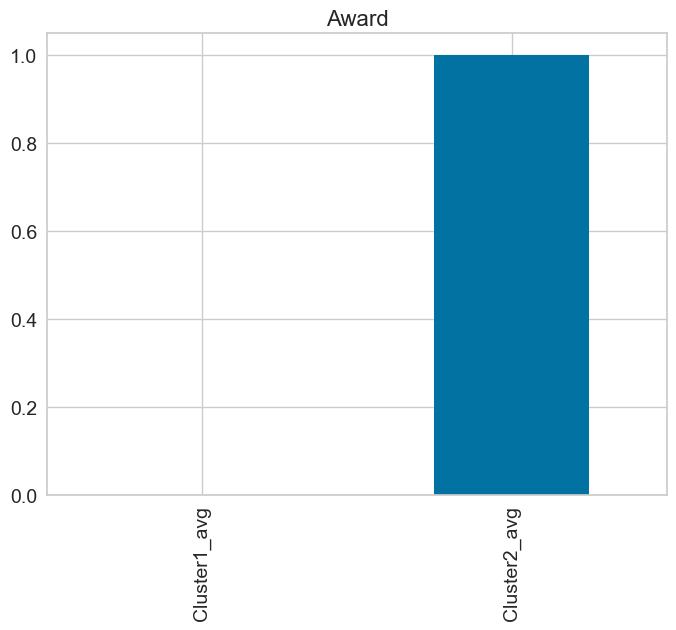

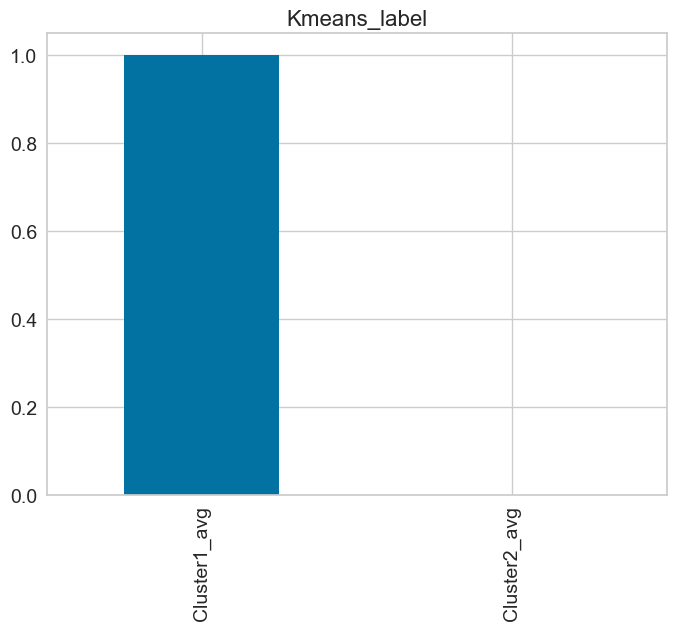

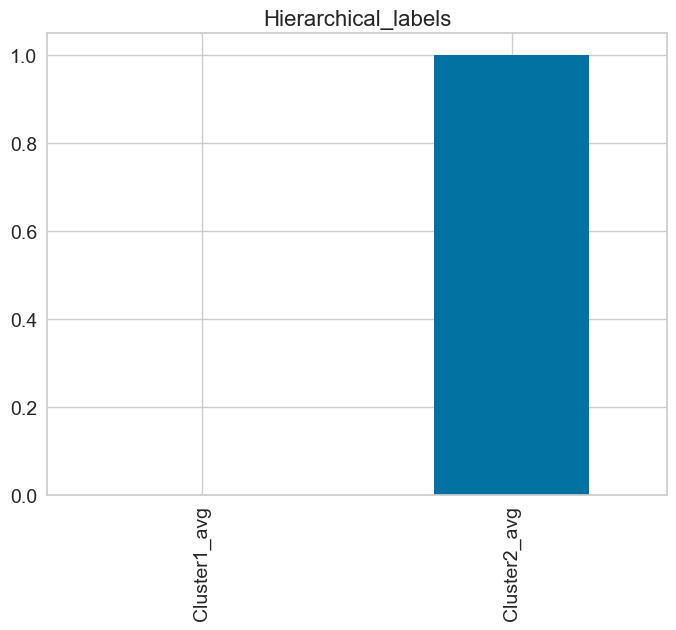

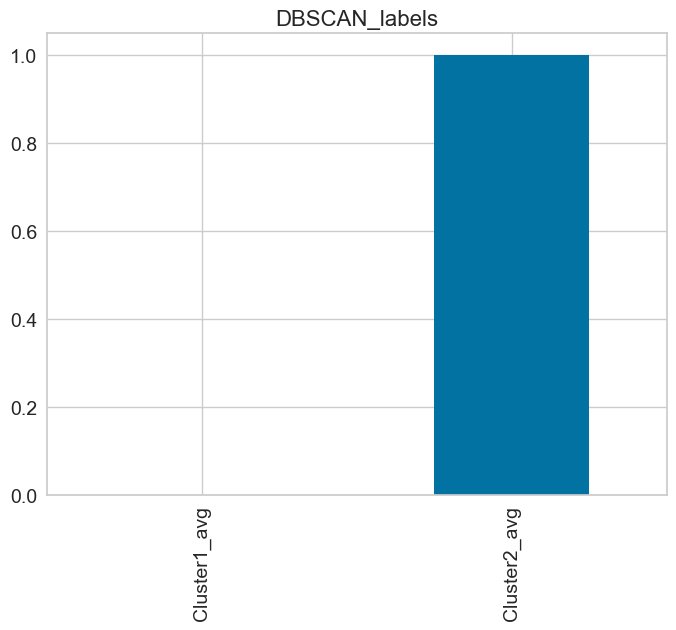

In [127]:
# Extract and plot one Column data .xs method
for i , row in avg_data.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_data.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

# Conclusion:
I have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.
Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.
I have used & analyzed two clustering techniques here..i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN.
By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building.
KMeans clustering is sensitive to outliers